# Predicting Titanic Survivors with Deep Learning with Numpy

This code will use Deep Learning to amke Titanic survivors predictions. It uses only numpy to implement Deep Learning. By doing so, I believe that the details of Deep Learning implementation becomes more clear. 


In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

First let's define the functions that we will use to construct the deep learning model. The pipeline will be as following:

**Forward Propagation**

1 - Inicialize the parameters;

2 - Create the Linear function to be used by the activation function;

3 - Create the activation function

4 - calculate the loss function

5 - Calculate the cost function

**Backward Propagation**

6 - Calculate the derivatives of the linear function

7 - calculate the activation derivatives

8 - calculate the linear derivatives

9 - Update weights


In [8]:
# 1 - Inicialize Parameters: It receives as inputs the dimensions of the layers. 
# It is an vector with size equals to the number of layers plus one (the X size). It returns a dictionary.

# We will focus on the dimensions because that is the easiest way to debug. Every WL has 
# demansions equal o (L x (L-1)), were L is the size of the layer. b has dimensions (L x 1). 

np.random.seed(1)
parameters = {}

def parameters_init(layers_dimensions):
  
    for i in range(1,len(layers_dimensions)):
        parameters['W' + str(i)] = np.random.randn(layers_dimensions[i],layers_dimensions[i-1])
        parameters['b' + str(i)] = np.zeros((layers_dimensions[i],1))
    
    return parameters    
    

In [9]:
layers_example = [9,2,1]
parameters = parameters_init(layers_example)
print(parameters)

{'W1': array([[ 1.62434536, -0.61175641, -0.52817175, -1.07296862,  0.86540763,
        -2.3015387 ,  1.74481176, -0.7612069 ,  0.3190391 ],
       [-0.24937038,  1.46210794, -2.06014071, -0.3224172 , -0.38405435,
         1.13376944, -1.09989127, -0.17242821, -0.87785842]]), 'b1': array([[ 0.],
       [ 0.]]), 'W2': array([[ 0.04221375,  0.58281521]]), 'b2': array([[ 0.]])}


In [10]:
# 2 - Create linear function that will be passed forward. Here we store the data that latter will be passed into the
# backwards propagation

# Looking at the expected dimensions, X has dimentions (n x m) where n is the size of each observation and m is the 
# number of observations. 
# ZL has dimensions (L x m) where L is the size of its layer. A_prev is the activation function over
# the last Z, (ZL-1), so its dimensions are (L-1 x m)

def linear_function(A_prev,W,b):
    
    Z = np.dot(W,A_prev) + b
    assert(Z.shape == (W.shape[0], A_prev.shape[1]))
    store = A_prev,W,b
    return Z, store





In [12]:
X_example = np.array([[2,7,6,0,3,4],[2,3,8,7,6,6],[5,9,1,1,2,3],[3,4,1,5,6,3],[7,6,4,7,2,1],[4,2,6,8,5,8],[4,3,2,2,2,1],[9,0,8,4,6,7],[5,7,8,9,3,2]])

Z, store = linear_function(X_example,parameters['W1'],parameters['b1'])
print(Z)
print('#####')
print(store)

[[ -5.25930768   8.54680539  -7.14444008 -19.21361814 -16.18903644
  -22.46903845]
 [-17.33649378 -26.67167399   2.48240703   2.15408276   1.00256332
    5.25098801]]
#####
(array([[2, 7, 6, 0, 3, 4],
       [2, 3, 8, 7, 6, 6],
       [5, 9, 1, 1, 2, 3],
       [3, 4, 1, 5, 6, 3],
       [7, 6, 4, 7, 2, 1],
       [4, 2, 6, 8, 5, 8],
       [4, 3, 2, 2, 2, 1],
       [9, 0, 8, 4, 6, 7],
       [5, 7, 8, 9, 3, 2]]), array([[ 1.62434536, -0.61175641, -0.52817175, -1.07296862,  0.86540763,
        -2.3015387 ,  1.74481176, -0.7612069 ,  0.3190391 ],
       [-0.24937038,  1.46210794, -2.06014071, -0.3224172 , -0.38405435,
         1.13376944, -1.09989127, -0.17242821, -0.87785842]]), array([[ 0.],
       [ 0.]]))


In [13]:
# 3 - Create the linear activation function. Let's build a general function that makes possible for the programmer 
# to choose between sigmoid, ReLU and leaky ReLU. 

def sigmoid(X):
    X = (X - np.min(X))/(np.max(X) - np.min(X))
    result = 1/(1 + np.exp(-X))
    activation_store = X
    return result, activation_store

def relu(X):

    result = np.maximum(0,X)
    activation_store = X
    return result, activation_store

def leaky_relu(X):

    result = np.maximum(0.01*X,X)
    activation_store = X
    return result, activation_store



def linear_activation_function(A_prev,W,b,activation):

    Z, store = linear_function(A_prev,W,b)
    # Z has dimensions (L x m) and so has A
    if activation == 'sigmoid':
        A, activation_store =  sigmoid(Z)
        
    elif activation == 'relu':
        A, activation_store =  relu(Z)
       
    elif activation == 'leaky_relu':
        A, activation_store =  leaky_relu(Z)
        
    
    store = store, activation_store
    return A, store

In [14]:
a, store = linear_activation_function(X_example,parameters['W1'],parameters['b1'],"leaky_relu")
print(store)

((array([[2, 7, 6, 0, 3, 4],
       [2, 3, 8, 7, 6, 6],
       [5, 9, 1, 1, 2, 3],
       [3, 4, 1, 5, 6, 3],
       [7, 6, 4, 7, 2, 1],
       [4, 2, 6, 8, 5, 8],
       [4, 3, 2, 2, 2, 1],
       [9, 0, 8, 4, 6, 7],
       [5, 7, 8, 9, 3, 2]]), array([[ 1.62434536, -0.61175641, -0.52817175, -1.07296862,  0.86540763,
        -2.3015387 ,  1.74481176, -0.7612069 ,  0.3190391 ],
       [-0.24937038,  1.46210794, -2.06014071, -0.3224172 , -0.38405435,
         1.13376944, -1.09989127, -0.17242821, -0.87785842]]), array([[ 0.],
       [ 0.]])), array([[ -5.25930768,   8.54680539,  -7.14444008, -19.21361814,
        -16.18903644, -22.46903845],
       [-17.33649378, -26.67167399,   2.48240703,   2.15408276,
          1.00256332,   5.25098801]]))


In [15]:
# Now, let's construct the model for L layers. this model will construct the forward propagation. We will iterate 
# Over each layer assigning its respectives parameters, Z values and activation functions.

def model_forward(X,parameters,activation_list):
    
    L = len(parameters)//2 -1
    print(L)
    np.random.seed(3)
    store = []
   
    A_prev = X

    activation_list[-1] = "sigmoid" # we enforce that the last activation function will be sigmoid
    print(L)
    for l in range (0,L):
        print(l)
        print(A_prev.shape)

        activation = activation_list[l]
     
        
        if activation == "sigmoid":
        
            A, aux = linear_activation_function(A_prev,parameters['W' + str(l+1)], parameters['b' + str(l+1)], "sigmoid")
            
            
        elif activation == "relu":

            A, aux = linear_activation_function(A_prev,parameters['W' + str(l+1)], parameters['b' + str(l+1)], "relu")
    
            
        elif activation == "leaky_relu":
            A, aux = linear_activation_function(A_prev,parameters['W' + str(l+1)], parameters['b' + str(l+1)], "leaky_relu")
      
        
        store.append(aux)
        A_prev = A

    AL, aux = linear_activation_function(A_prev,parameters['W'+str(L+1)], parameters['b' + str(L+1)], "sigmoid")
        
    store.append(aux)
    print('A_prev: ' + str(A_prev.shape))
    print('WL: ' + str(parameters['W'+str(L)]))
    print('b: ' + str(parameters['b'+str(L)]))
    print('AL: ' + str(AL.shape))
        
    
       
    return AL, store
    
    


In [16]:
a, store = model_forward(X_example,parameters,['leaky_relu','sigmoid','relu','relu'])
print(a)

1
1
0
(9, 6)
A_prev: (2, 6)
WL: [[ 1.62434536 -0.61175641 -0.52817175 -1.07296862  0.86540763 -2.3015387
   1.74481176 -0.7612069   0.3190391 ]
 [-0.24937038  1.46210794 -2.06014071 -0.3224172  -0.38405435  1.13376944
  -1.09989127 -0.17242821 -0.87785842]]
b: [[ 0.]
 [ 0.]]
AL: (1, 6)
[[ 0.5         0.52444097  0.6202188   0.60544244  0.55374737  0.73105858]]


In [17]:
# 4 - Calculate the loss function: As we will look for binary result (1 if survives and 0 if don't), 
# the last activation function will be the sigmoid. So our loss fucntion will be L = y*log(A) + (1-y)*log(1 - A)
def calculate_cost(Y, A):
    
    m = Y.shape[1]
    
    cost = -np.sum(Y*np.log(A) + (1-Y)*np.log(1-A))/m
    
    return cost

# cost has shape (1 x 1)

In [18]:
Y = np.array([[1],[0],[1],[0],[0],[1]])
Y = Y.reshape(1,6)

cost = calculate_cost(Y,a)

print(cost)

0.660702733794


** Backward Propagation **

Here we will calculate the derivatives. We will be using the chain rule, so for each step we will rely on the derivatives of the other functions, besides the information stored.

6 - Calculate the derivatives of the linear function

7 - calculate the activation derivatives

8 - calculate the model backpropagation

9 - Update weights



In [19]:
# 6 - Let's calculate the derivade of the linear function Z = W*A_prev +b, so 
#             dL/dW = dL/dA * dA/dZ * dZ/dW = grad_A * grad_Z * A_prev
#             dL/db = dL/dA * dA/dZ * dZ/db = grad_A * grad_Z * 1
#             dL/dA_prev = dL/dA * dA/dZ *dZ/dA_prev = grad_A * grad_Z * W

# dZ is the linear derivative of the next layer ZL, meaning that we are going to find dA(L-1) and 
# we need the derivative of the posterior ZL, besides all the information of that exists on the 
# layer L-1 (AL-1, W, b)

# the dimensions are: ZL = shape(Lxm), (AL-1) = shape(L-1xm), WL = shape(L,L-1), bL = shape(L,1)

def linear_function_gradient(dZ, store):
   
    
    A_prev, W, b = store
    m = A_prev.shape[1]
    dW = np.dot(dZ,A_prev.T)/m
    db = np.sum(dZ, axis = 1)/m

    dA_prev = np.dot(W.T,dZ)
    
    assert (dA_prev.shape == A_prev.shape)
    assert (dW.shape == W.shape)
    return dA_prev, dW, db
    
    
    

In [20]:
# In our example, lets take the 3 layer. its size is 2
dZ = np.matrix([[1.5,0.1,0.3,0.8,0.2,0.5],[0.5,0.7,0.3,0.9,0.1,0.2]])

a,b,c = linear_function_gradient(dZ,store[0][0])

In [21]:
# 7 - Now we will calculate the derivatives of the activation function. There will be different derivates for 
# sigmoid, relu and licky relu activation functions

def d_sigmoid(dA, activation_store):
  

    d_sig = sigmoid(activation_store)[0]*(1 - sigmoid(activation_store)[0].T)
    
    
    return np.multiply(d_sig,dA)

def d_relu(dA,activation_store):
    

    if np.maximum(dA, 0).any()>0:
        d_re = 1
    else:
        d_re = 0
        
    return np.multiply(d_re,dA)


def d_leaky_relu(dA,activation_store):
  
    if np.maximum(dA, 0).any() >0:
        d_leaky_re = 1
    else:
        d_leaky_re = 0.01
        
    return np.multiply(d_leaky_re,dA)
    
def linear_activation_backward(dA, store ,activation):
 

    linear_store, activation_store = store
    
    if activation == "relu":
        dZ = d_relu(dA,activation_store)
        dA_prev, dW, db = linear_function_gradient(dZ,linear_store)
       
    elif activation == "leaky_relu":
        dZ = d_leaky_relu(dA, activation_store)
        dA_prev, dW, db = linear_function_gradient(dZ,linear_store)
        
    elif activation == "sigmoid":
        
        dZ = d_sigmoid(dA, activation_store)
        dA_prev, dW, db = linear_function_gradient(dZ,linear_store)
     
    
    return dA_prev, dW, db
    
    
    
    

In [22]:
#

def model_backward(AL,Y,store, activation_list):

    
    grads = {}
   
    
    L = len(store) # the number of layers
    m = AL.shape[1]
    Y = Y.reshape(AL.shape) # after this line, Y is the same shape as AL
    
    # Initializing the backpropagation
   
    dAL = - np.divide(Y,AL) - np.divide(1-Y,1-AL)
  
    
    # Lth layer (SIGMOID -> LINEAR) gradients. Inputs: "AL, Y, caches". Outputs: "grads["dAL"], grads["dWL"], grads["dbL"]
    ### START CODE HERE ### (approx. 2 lines)
    current_store = store[L-1]
    grads["dA" + str(L)], grads["dW" + str(L)], grads["db" + str(L)] = linear_activation_backward(dAL,current_store,"sigmoid")

    ### END CODE HERE ###
    
    for l in reversed(range(L-1)):
   
        activation = activation_list[l]
        # lth layer: (RELU -> LINEAR) gradients.
        # Inputs: "grads["dA" + str(l + 2)], caches". Outputs: "grads["dA" + str(l + 2)] , grads["dW" + str(l + 1)] , grads["db" + str(l + 1)] 
        
        current_store = store[l]
    
        dA_prev_temp, dW_temp, db_temp = linear_activation_backward(grads['dA' + str(l+2)],current_store,activation)
        grads["dA" + str(l + 1)] = dA_prev_temp
        grads["dW" + str(l + 1)] = dW_temp
        grads["db" + str(l + 1)] = db_temp

  

    return grads
    

In [23]:
def update_parameters(parameters, grads, learning_rate):
    
    """
    Update parameters using gradient descent
    
    Arguments:
    parameters -- python dictionary containing your parameters 
    grads -- python dictionary containing your gradients, output of L_model_backward
    
    Returns:
    parameters -- python dictionary containing your updated parameters 
                  parameters["W" + str(l)] = ... 
                  parameters["b" + str(l)] = ...
    """
    
    L = len(parameters) // 2 -1 # number of layers in the neural network

    # Update rule for each parameter. Use a for loop.
    
    for l in range(L):
        parameters["W" + str(l+1)] = parameters["W" + str(l+1)] - learning_rate*grads['dW' + str(l+1)]
        parameters["b" + str(l+1)] = parameters["b" + str(l+1)] - learning_rate*grads['db' + str(l+1)]
        
        
    
        
    return parameters

In [24]:
import pandas as pd
train_x = pd.read_csv('/Users/ViniciusPantoja/Dropbox/GitHub/Titanic_challenge/data/X_train_modified.csv')
train_y = pd.read_csv('/Users/ViniciusPantoja/Dropbox/GitHub/Titanic_challenge/data/Y_train_modified.csv')
test_x = pd.read_csv('/Users/ViniciusPantoja/Dropbox/GitHub/Titanic_challenge/data/X_test_modified.csv')
test_y = pd.read_csv('/Users/ViniciusPantoja/Dropbox/GitHub/Titanic_challenge/data/Y_test_modified.csv')

train_x = train_x[['Age','Cabin','Fare','Parch','Pclass','SibSp', 'Embarked_C', 'Embarked_Q','Embarked_S']]

test_x = test_x[['Age','Cabin','Fare','Parch','Pclass','SibSp', 'Embarked_C', 'Embarked_Q','Embarked_S']]


train_x = np.matrix(train_x)
train_y = np.matrix(train_y)
test_x = np.matrix(test_x)
test_y = np.matrix(test_y)

train_x = (train_x - np.min(train_x))/(np.max(train_x) - np.min(train_x))
test_x = (test_x - np.min(test_x))/(np.max(test_x) - np.min(test_x))





In [25]:
m_train = train_x.shape[0]
n_var = train_x.shape[1]
m_test = test_x.shape[0]

In [26]:
train_x_flatten = train_x.reshape(train_x.shape[0], -1).T   # The "-1" makes reshape flatten the remaining dimensions
test_x_flatten = test_x.reshape(test_x.shape[0], -1).T

# Standardize data to have feature values between 0 and 1.
train_x = train_x_flatten/255.
test_x = test_x_flatten/255.

print ("train_x's shape: " + str(train_x.shape))
print ("test_x's shape: " + str(test_x.shape))


train_x's shape: (9, 712)
test_x's shape: (9, 179)


In [27]:
layers_dims = [9, 5,1] #  2-layer model

In [28]:
def L_layer_model(X, Y, layers_dims,activation_list, learning_rate = 0.0075, num_iterations = 3000, print_cost=False):#lr was 0.009
    """
    Implements a L-layer neural network: [LINEAR->RELU]*(L-1)->LINEAR->SIGMOID.
    
    Arguments:
    X -- data, numpy array of shape (number of examples, num_px * num_px * 3)
    Y -- true "label" vector (containing 0 if cat, 1 if non-cat), of shape (1, number of examples)
    layers_dims -- list containing the input size and each layer size, of length (number of layers + 1).
    learning_rate -- learning rate of the gradient descent update rule
    num_iterations -- number of iterations of the optimization loop
    print_cost -- if True, it prints the cost every 100 steps
    
    Returns:
    parameters -- parameters learnt by the model. They can then be used to predict.
    """
   
    np.random.seed(1)
    costs = []                         # keep track of cost
    
    # Parameters initialization.
    ### START CODE HERE ###
    
    parameters = parameters_init(layers_dims)
    
    ### END CODE HERE ###
    
    # Loop (gradient descent)
    for i in range(0, num_iterations):
        
        
        # Forward propagation: [LINEAR -> RELU]*(L-1) -> LINEAR -> SIGMOID.
        ### START CODE HERE ### (≈ 1 line of code)
        AL, caches = model_forward(X,parameters, activation_list)
        
        ### END CODE HERE ###
    
        # Compute cost.
        ### START CODE HERE ### (≈ 1 line of code)

        cost = calculate_cost(Y,AL)
        
        ### END CODE HERE ###
    
        # Backward propagation.
        ### START CODE HERE ### (≈ 1 line of code)
        grads = model_backward(AL,Y,caches, activation_list)
        
        ### END CODE HERE ###
 
        # Update parameters.
        ### START CODE HERE ### (≈ 1 line of code)
        parameters = update_parameters(parameters,grads,learning_rate)
        ### END CODE HERE ###
                
        # Print the cost every 100 training example
        if print_cost and i % 100 == 0:
            print ("Cost after iteration %i: %f" %(i, cost))
        if print_cost and i % 1 == 0:
            costs.append(cost)
            
    # plot the cost
    plt.plot(np.squeeze(costs))
    plt.ylabel('cost')
    plt.xlabel('iterations (per tens)')
    plt.title("Learning rate =" + str(learning_rate))
    plt.show()
    
    return parameters

1
1
0
(9, 712)
A_prev: (5, 712)
WL: [[ 1.62434536 -0.61175641 -0.52817175 -1.07296862  0.86540763 -2.3015387
   1.74481176 -0.7612069   0.3190391 ]
 [-0.24937038  1.46210794 -2.06014071 -0.3224172  -0.38405435  1.13376944
  -1.09989127 -0.17242821 -0.87785842]
 [ 0.04221375  0.58281521 -1.10061918  1.14472371  0.90159072  0.50249434
   0.90085595 -0.68372786 -0.12289023]
 [-0.93576943 -0.26788808  0.53035547 -0.69166075 -0.39675353 -0.6871727
  -0.84520564 -0.67124613 -0.0126646 ]
 [-1.11731035  0.2344157   1.65980218  0.74204416 -0.19183555 -0.88762896
  -0.74715829  1.6924546   0.05080775]]
b: [[ 0.]
 [ 0.]
 [ 0.]
 [ 0.]
 [ 0.]]
AL: (1, 712)
Cost after iteration 0: 360550.736616
1
1
0
(9, 712)
A_prev: (5, 712)
WL: [[ 1.6239675  -0.61176666 -0.52858185 -1.0729736   0.86537699 -2.30154611
   1.74480953 -0.76120801  0.31902942]
 [-0.24925712  1.46211101 -2.0600178  -0.32241571 -0.38404517  1.13377167
  -1.0998906  -0.17242788 -0.87785552]
 [ 0.04345962  0.58284898 -1.09926705  1.1447401

1
1
0
(9, 712)
A_prev: (5, 712)
WL: [[ 1.61886982 -0.61191169 -0.53338829 -1.07303456  0.86494944 -2.30164516
   1.74478293 -0.76122298  0.31889612]
 [-0.24772929  1.46215448 -2.05857725 -0.32239744 -0.38391703  1.13380135
  -1.09988263 -0.17242339 -0.87781556]
 [ 0.06026732  0.58332719 -1.08341961  1.14494112  0.90310142  0.50284535
   0.90095101 -0.68367486 -0.1224188 ]
 [-0.93473656 -0.26785879  0.53133948 -0.69164831 -0.3966671  -0.68715262
  -0.8452002  -0.6712431  -0.01263763]
 [-1.11200494  0.23456615  1.66485662  0.74210805 -0.1913916  -0.88752581
  -0.74713036  1.69247018  0.05094629]]
b: [[-24.58437833]
 [  7.36824267]
 [ 81.05780179]
 [  4.63744637]
 [ 23.82049993]]
AL: (1, 712)
1
1
0
(9, 712)
A_prev: (5, 712)
WL: [[ 1.61844498 -0.61192378 -0.53378882 -1.07303964  0.86491381 -2.30165341
   1.74478072 -0.76122422  0.31888501]
 [-0.24760196  1.4621581  -2.05845721 -0.32239592 -0.38390635  1.13380382
  -1.09988196 -0.17242302 -0.87781224]
 [ 0.06166807  0.58336705 -1.08209901  

b: [[ -49.37220398]
 [  14.79746102]
 [ 162.7863951 ]
 [   9.31326979]
 [  47.83812573]]
AL: (1, 712)
1
1
0
(9, 712)
A_prev: (5, 712)
WL: [[ 1.6129216  -0.61208092 -0.53899558 -1.07310569  0.86445059 -2.3017607
   1.7447519  -0.76124044  0.31874058]
 [-0.24594653  1.4622052  -2.05689667 -0.32237612 -0.38376752  1.13383598
  -1.09987333 -0.17241816 -0.87776895]
 [ 0.07987934  0.58388517 -1.06493165  1.14517564  0.9047462   0.50322633
   0.90105332 -0.68361728 -0.12190597]
 [-0.93361453 -0.26782687  0.53239721 -0.6916349  -0.396573   -0.68713082
  -0.84519435 -0.6712398  -0.01260829]
 [-1.10624154  0.23473013  1.67028969  0.74217697 -0.19090825 -0.88741385
  -0.74710029  1.6924871   0.051097  ]]
b: [[ -51.27904967]
 [  15.36896629]
 [ 169.0735063 ]
 [   9.67296547]
 [  49.68572248]]
AL: (1, 712)
1
1
0
(9, 712)
A_prev: (5, 712)
WL: [[ 1.61249669 -0.61209301 -0.53939609 -1.07311077  0.86441496 -2.30176896
   1.74474969 -0.76124169  0.31872947]
 [-0.24581918  1.46220882 -2.05677664 -0.32237

b: [[ -76.06925646]
 [  22.7988983 ]
 [ 250.80995055]
 [  14.34923806]
 [  73.70565544]]
AL: (1, 712)
1
1
0
(9, 712)
A_prev: (5, 712)
WL: [[ 1.60697234 -0.61225018 -0.54460262 -1.07317683  0.86395168 -2.30187625
   1.74472087 -0.7612579   0.31858502]
 [-0.24416346  1.46225592 -2.05521617 -0.3223548  -0.38361799  1.13387061
  -1.09986403 -0.17241292 -0.87772233]
 [ 0.09949482  0.58444321 -1.04644451  1.14541018  0.90639117  0.50360731
   0.90115563 -0.68355969 -0.12139308]
 [-0.93249229 -0.26779494  0.53345489 -0.69162148 -0.39647889 -0.68710903
  -0.8451885  -0.67123651 -0.01257895]
 [-1.10047713  0.23489412  1.67572251  0.74224589 -0.19042484 -0.88730189
  -0.74707023  1.69250402  0.05124772]]
b: [[ -77.97629072]
 [  23.37046009]
 [ 257.09768346]
 [  14.7089693 ]
 [  75.5534349 ]]
AL: (1, 712)
1
1
0
(9, 712)
A_prev: (5, 712)
WL: [[ 1.60654735 -0.61226227 -0.54500312 -1.07318191  0.86391604 -2.30188451
   1.74471866 -0.76125915  0.31857391]
 [-0.24403609  1.46225955 -2.05509614 -0.3223

1
1
0
(9, 712)
A_prev: (5, 712)
WL: [[ 1.60144702 -0.61240736 -0.54980893 -1.07324289  0.86348835 -2.30198355
   1.74469206 -0.76127412  0.31844056]
 [-0.24250746  1.46230303 -2.05365578 -0.322335   -0.38347912  1.13390277
  -1.09985539 -0.17240806 -0.87767903]
 [ 0.11771246  0.58496146 -1.02927867  1.14562799  0.90791881  0.50396108
   0.90125063 -0.68350622 -0.12091677]
 [-0.93145003 -0.26776529  0.53443697 -0.69160902 -0.39639149 -0.68708879
  -0.84518306 -0.67123345 -0.01255169]
 [-1.0951235   0.23504642  1.68076705  0.7423099  -0.18997591 -0.88719793
  -0.74704231  1.69251973  0.0513877 ]]
b: [[-102.76902307]
 [  30.80114904]
 [ 338.8424548 ]
 [  19.3857183 ]
 [  99.57581494]]
AL: (1, 712)
1
1
0
(9, 712)
A_prev: (5, 712)
WL: [[ 1.60102196 -0.61241945 -0.5502094  -1.07324797  0.86345271 -2.30199181
   1.74468984 -0.76127537  0.31842944]
 [-0.24238006  1.46230666 -2.05353575 -0.32233348 -0.38346844  1.13390524
  -1.09985473 -0.17240769 -0.8776757 ]
 [ 0.11911396  0.58500133 -1.02795

1
1
0
(9, 712)
A_prev: (5, 712)
WL: [[ 1.5959207  -0.61256456 -0.55501499 -1.07330895  0.86302497 -2.30209085
   1.74466325 -0.76129034  0.31829608]
 [-0.24085115  1.46235015 -2.05209546 -0.3223152  -0.38334024  1.13393493
  -1.09984676 -0.1724032  -0.87763573]
 [ 0.13593346  0.58547978 -1.01211362  1.14584582  0.90944664  0.50431486
   0.90134563 -0.68345274 -0.1204404 ]
 [-0.93040758 -0.26773564  0.53541901 -0.69159655 -0.39630408 -0.68706855
  -0.84517763 -0.67123039 -0.01252444]
 [-1.08976889  0.23519874  1.68581135  0.74237391 -0.18952693 -0.88709397
  -0.74701439  1.69253545  0.05152769]]
b: [[-127.56424168]
 [  38.23258316]
 [ 420.59542364]
 [  24.06293628]
 [ 123.60060399]]
AL: (1, 712)
1
1
0
(9, 712)
A_prev: (5, 712)
WL: [[ 1.59549555 -0.61257665 -0.55541545 -1.07331403  0.86298933 -2.3020991
   1.74466103 -0.76129159  0.31828496]
 [-0.24072373  1.46235377 -2.05197544 -0.32231368 -0.38332956  1.1339374
  -1.09984609 -0.17240282 -0.87763239]
 [ 0.13733522  0.58551965 -1.0107932

WL: [[ 1.5903933  -0.61272179 -0.5602208  -1.07337502  0.86256154 -2.30219815
   1.74463444 -0.76130656  0.31815158]
 [-0.23919452  1.46239727 -2.05053521 -0.3222954  -0.38320135  1.13396709
  -1.09983812 -0.17239834 -0.87759242]
 [ 0.154158    0.58599817 -0.99494941  1.14606366  0.91097465  0.50466863
   0.90144062 -0.68339926 -0.11996396]
 [-0.92936492 -0.26770598  0.536401   -0.69158409 -0.39621666 -0.68704831
  -0.84517219 -0.67122733 -0.01249718]
 [-1.08441323  0.23535108  1.69085541  0.74243793 -0.18907789 -0.88699
  -0.74698648  1.69255117  0.0516677 ]]
b: [[-152.36209487]
 [  45.66480689]
 [ 502.35707902]
 [  28.74065124]
 [ 147.62794575]]
AL: (1, 712)
1
1
0
(9, 712)
A_prev: (5, 712)
WL: [[ 1.58996807 -0.61273388 -0.56062124 -1.0733801   0.86252588 -2.3022064
   1.74463222 -0.76130781  0.31814046]
 [-0.23906707  1.4624009  -2.0504152  -0.32229388 -0.38319066  1.13396956
  -1.09983746 -0.17239796 -0.87758909]
 [ 0.15556004  0.58603805 -0.99362912  1.14608042  0.9110922   0.50469

1
1
0
(9, 712)
A_prev: (5, 712)
WL: [[ 1.58443943 -0.61289113 -0.56582675 -1.07344618  0.86206238 -2.3023137
   1.74460341 -0.76132403  0.31799594]
 [-0.23741007  1.46244803 -2.04885504 -0.32227407 -0.38305174  1.13400172
  -1.09982882 -0.1723931  -0.87754577]
 [ 0.17378864  0.58655652 -0.97646588  1.14629829  0.91262043  0.50504963
   0.90154293 -0.68334166 -0.11945079]
 [-0.92824182 -0.26767403  0.53745848 -0.69157067 -0.3961225  -0.68702651
  -0.84516634 -0.67122404 -0.01246782]
 [-1.07864436  0.23551516  1.69628717  0.74250688 -0.18859425 -0.88687804
  -0.74695641  1.69256809  0.0518185 ]]
b: [[-179.0706077 ]
 [  53.66967897]
 [ 590.41842067]
 [  33.77878131]
 [ 173.50657972]]
AL: (1, 712)
1
1
0
(9, 712)
A_prev: (5, 712)
WL: [[ 1.5840141  -0.61290323 -0.56622717 -1.07345127  0.86202672 -2.30232196
   1.74460119 -0.76132528  0.31798482]
 [-0.2372826   1.46245165 -2.04873503 -0.32227255 -0.38304106  1.13400419
  -1.09982816 -0.17239273 -0.87754244]
 [ 0.17519101  0.58659641 -0.975145

1
1
0
(9, 712)
A_prev: (5, 712)
WL: [[ 1.579335   -0.61303631 -0.57063159 -1.07350718  0.86163447 -2.30241275
   1.74457681 -0.76133901  0.31786251]
 [-0.23588021  1.46249154 -2.04741497 -0.32225579 -0.38292349  1.13403141
  -1.09982085 -0.17238861 -0.87750578]
 [ 0.19061862  0.58703519 -0.96062372  1.14649942  0.91403129  0.50537619
   0.90163062 -0.68329228 -0.11901087]
 [-0.92727895 -0.26764665  0.53836483 -0.69155916 -0.39604178 -0.68700782
  -0.84516132 -0.67122121 -0.01244265]
 [-1.07369853  0.23565582  1.70094272  0.74256599 -0.18817964 -0.88678207
  -0.74693064  1.6925826   0.05194778]]
b: [[-201.96636824]
 [  60.53182198]
 [ 665.90863623]
 [  38.09769717]
 [ 195.69093008]]
AL: (1, 712)
1
1
0
(9, 712)
A_prev: (5, 712)
WL: [[ 1.57890958 -0.61304841 -0.57103198 -1.07351227  0.86159881 -2.302421
   1.74457459 -0.76134026  0.31785139]
 [-0.23575271  1.46249516 -2.04729497 -0.32225427 -0.38291281  1.13403388
  -1.09982018 -0.17238824 -0.87750245]
 [ 0.19202128  0.58707508 -0.9593035

A_prev: (5, 712)
WL: [[ 1.57422945 -0.61318151 -0.57543617 -1.07356819  0.86120651 -2.30251179
   1.74455022 -0.76135399  0.31772906]
 [-0.23435002  1.46253506 -2.04597498 -0.32223751 -0.38279523  1.13406109
  -1.09981288 -0.17238412 -0.87746578]
 [ 0.20745223  0.58751393 -0.94478241  1.14670057  0.91544235  0.50570277
   0.90171831 -0.6832429  -0.11857088]
 [-0.92631588 -0.26761926  0.53927114 -0.69154765 -0.39596105 -0.68698914
  -0.8451563  -0.67121839 -0.01241748]
 [-1.06875163  0.23579651  1.70559801  0.7426251  -0.18776497 -0.8866861
  -0.74690487  1.69259712  0.05207708]]
b: [[-224.86482848]
 [  67.39477412]
 [ 741.40775304]
 [  42.41712229]
 [ 217.87789626]]
AL: (1, 712)
1
1
0
(9, 712)
A_prev: (5, 712)
WL: [[ 1.57380394 -0.61319361 -0.57583654 -1.07357328  0.86117084 -2.30252005
   1.744548   -0.76135523  0.31771794]
 [-0.23422248  1.46253868 -2.04585498 -0.32223598 -0.38278454  1.13406357
  -1.09981221 -0.17238375 -0.87746245]
 [ 0.20885521  0.58755383 -0.94346235  1.14671733 

A_prev: (5, 712)
WL: [[ 1.56912274 -0.61332673 -0.58024048 -1.07362921  0.86077848 -2.30261084
   1.74452362 -0.76136896  0.3175956 ]
 [-0.23281947  1.46257858 -2.04453507 -0.32221922 -0.38266694  1.13409078
  -1.09980491 -0.17237964 -0.87742578]
 [ 0.22428972  0.58799275 -0.92894202  1.14690174  0.91685361  0.50602934
   0.901806   -0.68319352 -0.11813083]
 [-0.92535258 -0.26759186  0.54017739 -0.69153614 -0.39588031 -0.68697046
  -0.84515129 -0.67121556 -0.01239231]
 [-1.06380358  0.23593722  1.71025304  0.74268422 -0.18735024 -0.88659013
  -0.7468791   1.69261163  0.0522064 ]]
b: [[-247.76615643]
 [  74.25858574]
 [ 816.91632508]
 [  46.73708836]
 [ 240.06764105]]
AL: (1, 712)
1
1
0
(9, 712)
A_prev: (5, 712)
WL: [[ 1.56869712 -0.61333883 -0.58064082 -1.07363429  0.86074281 -2.3026191
   1.7445214  -0.76137021  0.31758447]
 [-0.23269191  1.46258221 -2.04441508 -0.3222177  -0.38265625  1.13409325
  -1.09980424 -0.17237926 -0.87742245]
 [ 0.22569303  0.58803265 -0.92762203  1.1469185  

A_prev: (5, 712)
WL: [[ 1.56401482 -0.61347198 -0.58504453 -1.07369023  0.86035039 -2.30270989
   1.74449702 -0.76138394  0.31746211]
 [-0.23128857  1.46262211 -2.04309523 -0.32220093 -0.38253864  1.13412046
  -1.09979694 -0.17237515 -0.87738578]
 [ 0.24113116  0.58847164 -0.91310244  1.14710293  0.91826508  0.50635591
   0.90189369 -0.68314413 -0.1176907 ]
 [-0.92438905 -0.26756447  0.5410836  -0.69152463 -0.39579956 -0.68695177
  -0.84514627 -0.67121274 -0.01236713]
 [-1.05885438  0.23607796  1.71490782  0.74274334 -0.18693545 -0.88649416
  -0.74685333  1.69262614  0.05233574]]
b: [[-270.67030839]
 [  81.12324376]
 [ 892.43420821]
 [  51.05758713]
 [ 262.26012209]]
AL: (1, 712)
1
1
0
(9, 712)
A_prev: (5, 712)
WL: [[ 1.56358912 -0.61348408 -0.58544487 -1.07369531  0.86031471 -2.30271814
   1.74449481 -0.76138519  0.31745098]
 [-0.23116098  1.46262574 -2.04297525 -0.32219941 -0.38252794  1.13412294
  -1.09979627 -0.17237477 -0.87738244]
 [ 0.24253476  0.58851155 -0.91178249  1.1471197 

1
0
(9, 712)
A_prev: (5, 712)
WL: [[ 1.5542218  -0.6137504  -0.59425221 -1.0738072   0.85952979 -2.30289972
   1.74444605 -0.76141265  0.31720622]
 [-0.22835348  1.46270556 -2.04033558 -0.32216587 -0.38229269  1.13417736
  -1.09978166 -0.17236654 -0.87730908]
 [ 0.27341999  0.58938964 -0.88274356  1.14748861  0.92097068  0.50698179
   0.90206176 -0.68304948 -0.116847  ]
 [-0.92254176 -0.26751195  0.54282048 -0.69150257 -0.39564477 -0.68691597
  -0.84513666 -0.67120732 -0.01231886]
 [-1.04936564  0.23634773  1.7238294   0.74285668 -0.18614035 -0.88631023
  -0.74680394  1.69265396  0.05258368]]
b: [[ -314.57500389]
 [   94.28202478]
 [ 1037.19353702]
 [   59.33949965]
 [  304.80062412]]
AL: (1, 712)
1
1
0
(9, 712)
A_prev: (5, 712)
WL: [[ 1.55379593 -0.61376251 -0.59465254 -1.07381229  0.85949411 -2.30290797
   1.74444383 -0.7614139   0.31719509]
 [-0.22822584  1.46270919 -2.04021559 -0.32216435 -0.382282    1.13417983
  -1.09978099 -0.17236617 -0.87730575]
 [ 0.27482415  0.58942956 -0.88

A_prev: (5, 712)
WL: [[ 1.54911081 -0.61389568 -0.59905619 -1.07386824  0.85910161 -2.30299874
   1.74441945 -0.76142763  0.31707269]
 [-0.22682165  1.4627491  -2.03889576 -0.32214758 -0.38216436  1.13420704
  -1.09977369 -0.17236205 -0.87726906]
 [ 0.29027157  0.58986866 -0.86690421  1.14768987  0.92238246  0.5073083
   0.90214945 -0.68300009 -0.11640674]
 [-0.92157765 -0.26748454  0.54372667 -0.69149105 -0.395564   -0.68689729
  -0.84513164 -0.67120449 -0.01229367]
 [-1.04441346  0.2364885   1.72848412  0.74291583 -0.18572547 -0.88621428
  -0.74677817  1.69266847  0.05271306]]
b: [[ -337.48451869]
 [  101.1482901 ]
 [ 1112.72910212]
 [   63.66101003]
 [  326.99830138]]
AL: (1, 712)
1
1
0
(9, 712)
A_prev: (5, 712)
WL: [[ 1.54868484 -0.61390779 -0.59945653 -1.07387333  0.85906593 -2.303007
   1.74441724 -0.76142888  0.31706156]
 [-0.22669398  1.46275273 -2.03877578 -0.32214605 -0.38215367  1.13420951
  -1.09977302 -0.17236168 -0.87726573]
 [ 0.29167604  0.58990858 -0.86558427  1.147706

  -0.74675025  1.69268419  0.05285324]]
b: [[ -362.30532328]
 [  108.58739265]
 [ 1194.56643117]
 [   68.3430544 ]
 [  351.0478814 ]]
AL: (1, 712)
1
1
0
(9, 712)
A_prev: (5, 712)
WL: [[ 1.54314652 -0.6140652  -0.60466086 -1.07393947  0.85860202 -2.30311427
   1.74438842 -0.7614451   0.31691689]
 [-0.22503408  1.46279991 -2.03721598 -0.32212623 -0.38201463  1.13424166
  -1.09976439 -0.17235682 -0.87722237]
 [ 0.30993658  0.59042756 -0.84842491  1.14792471  0.92402967  0.5076892
   0.90225176 -0.68294247 -0.11589305]
 [-0.92045258 -0.26745256  0.5447839  -0.69147762 -0.39546976 -0.68687549
  -0.84512578 -0.6712012  -0.01226428]
 [-1.03863449  0.23665274  1.73391464  0.74298484 -0.18524141 -0.88610235
  -0.7467481   1.6926854   0.05286402]]
b: [[ -364.21468501]
 [  109.15965201]
 [ 1200.86183805]
 [   68.70322468]
 [  352.89791602]]
AL: (1, 712)
1
1
0
(9, 712)
A_prev: (5, 712)
WL: [[ 1.54272045 -0.61407731 -0.6050612  -1.07394456  0.85856634 -2.30312252
   1.7443862  -0.76144635  0.316905

b: [[ -385.218254  ]
 [  115.45468177]
 [ 1270.11325901]
 [   72.66520914]
 [  373.24886845]]
AL: (1, 712)
1
1
0
(9, 712)
A_prev: (5, 712)
WL: [[ 1.53803309 -0.6142105  -0.60946502 -1.07400053  0.85817379 -2.30321327
   1.74436182 -0.76146008  0.31678334]
 [-0.22350152  1.46284346 -2.03577611 -0.32210793 -0.38188628  1.13427133
  -1.09975641 -0.17235233 -0.87718234]
 [ 0.32679622  0.59090665 -0.83258499  1.14812604  0.92544161  0.50801563
   0.90233946 -0.68289309 -0.11545271]
 [-0.91948802 -0.26742516  0.54569013 -0.6914661  -0.39538898 -0.68685682
  -0.84512077 -0.67119837 -0.01223909]
 [-1.03367994  0.23679353  1.73856953  0.743044   -0.18482648 -0.88600642
  -0.74672233  1.69269992  0.05299342]]
b: [[ -387.12772451]
 [  116.02697373]
 [ 1276.40902455]
 [   73.02539995]
 [  375.09900846]]
AL: (1, 712)
1
1
0
(9, 712)
A_prev: (5, 712)
WL: [[ 1.53760692 -0.61422261 -0.60986538 -1.07400562  0.8581381  -2.30322152
   1.74435961 -0.76146133  0.31677221]
 [-0.22337379  1.46284709 -2.035656

 [  395.45116655]]
AL: (1, 712)
1
1
0
(9, 712)
A_prev: (5, 712)
WL: [[ 1.5329185  -0.61435581 -0.61426936 -1.0740616   0.85774554 -2.30331227
   1.74433522 -0.76147506  0.31664977]
 [-0.22196861  1.46288701 -2.03433619 -0.32208963 -0.38175793  1.134301
  -1.09974844 -0.17234784 -0.87714231]
 [ 0.34365968  0.59138576 -0.81674447  1.14832739  0.92685361  0.50834203
   0.90242717 -0.68284371 -0.11501233]
 [-0.91852323 -0.26739774  0.54659639 -0.69145458 -0.3953082  -0.68683814
  -0.84511575 -0.67119555 -0.01221389]
 [-1.02872427  0.23693433  1.74322459  0.74310318 -0.18441153 -0.8859105
  -0.74669656  1.69271443  0.05312284]]
b: [[ -410.04212599]
 [  122.89470366]
 [ 1351.96070166]
 [   77.34783212]
 [  397.30142056]]
AL: (1, 712)
1
1
0
(9, 712)
A_prev: (5, 712)
WL: [[ 1.53249222 -0.61436792 -0.61466973 -1.07406669  0.85770985 -2.30332052
   1.74433301 -0.76147631  0.31663864]
 [-0.22184085  1.46289064 -2.03421619 -0.3220881  -0.38174723  1.13430348
  -1.09974778 -0.17234746 -0.87713897]


WL: [[ 1.52353841 -0.61462223 -0.62307784 -1.07417358  0.85696037 -2.30349372
   1.74428645 -0.76150251  0.31640488]
 [-0.21915728  1.46296686 -2.03169618 -0.32205606 -0.38152261  1.13435539
  -1.09973383 -0.17233961 -0.87706891]
 [ 0.37458702  0.59226419 -0.78770181  1.14869662  0.92944241  0.50894029
   0.90258797 -0.68275318 -0.11420487]
 [-0.91675383 -0.26734749  0.54825797 -0.69143346 -0.39516009 -0.68680392
  -0.84510655 -0.67119037 -0.0121677 ]
 [-1.01963564  0.23719247  1.75175937  0.74321168 -0.18365076 -0.88573469
  -0.7466493   1.69274103  0.05336012]]
b: [[ -452.0557863 ]
 [  135.48671801]
 [ 1490.48504847]
 [   85.27303136]
 [  438.00964507]]
AL: (1, 712)
1
1
0
(9, 712)
A_prev: (5, 712)
WL: [[ 1.52311193 -0.61463435 -0.62347824 -1.07417867  0.85692468 -2.30350197
   1.74428424 -0.76150376  0.31639374]
 [-0.21902946  1.46297049 -2.03157617 -0.32205454 -0.38151191  1.13435786
  -1.09973316 -0.17233923 -0.87706557]
 [ 0.37599317  0.59230412 -0.78638163  1.14871341  0.92956009

1
1
0
(9, 712)
A_prev: (5, 712)
WL: [[ 1.51799339 -0.61477968 -0.62828322 -1.07423978  0.85649638 -2.30360091
   1.74425763 -0.76151874  0.31626015]
 [-0.21749537  1.46301405 -2.03013606 -0.32203622 -0.38138354  1.13438751
  -1.09972519 -0.17233475 -0.87702553]
 [ 0.39286964  0.5927833  -0.77053901  1.14891486  0.93097224  0.50929373
   0.90268299 -0.6826997  -0.11372768]
 [-0.91570785 -0.26731779  0.54923988 -0.69142097 -0.39507256 -0.6867837
  -0.84510111 -0.67118731 -0.01214039]
 [-1.01426291  0.23734502  1.75680301  0.74327582 -0.18320119 -0.88563082
  -0.74662138  1.69275675  0.05350036]]
b: [[ -476.8846187 ]
 [  142.92822659]
 [ 1572.34884623]
 [   89.95659004]
 [  462.06700347]]
AL: (1, 712)
1
1
0
(9, 712)
A_prev: (5, 712)
WL: [[ 1.5175668  -0.61479179 -0.62868367 -1.07424487  0.85646069 -2.30360916
   1.74425542 -0.76151999  0.31624901]
 [-0.21736752  1.46301768 -2.03001604 -0.3220347  -0.38137285  1.13438999
  -1.09972452 -0.17233437 -0.8770222 ]
 [ 0.39427617  0.59282323 -0.7

b: [[ -501.71167206]
 [  150.36920197]
 [ 1654.20677824]
 [   94.63981314]
 [  486.1226381 ]]
AL: (1, 712)
1
1
0
(9, 712)
A_prev: (5, 712)
WL: [[ 1.51202079 -0.6149492  -0.6338902  -1.07431107  0.85599679 -2.30371631
   1.74422659 -0.7615362   0.3161043 ]
 [-0.21570531  1.46306485 -2.02845558 -0.32201485 -0.38123381  1.1344221
  -1.09971588 -0.17232951 -0.87697882]
 [ 0.41256206  0.59334223 -0.75205209  1.14914994  0.93261945  0.5096742
   0.90278534 -0.68264211 -0.11321382]
 [-0.91458122 -0.26728581  0.55029755 -0.69140752 -0.39497832 -0.68676193
  -0.84509526 -0.67118401 -0.012111  ]
 [-1.00847589  0.23750928  1.76223578  0.7433449  -0.18271712 -0.88551901
  -0.7465913   1.69277367  0.05365136]]
b: [[ -503.62128174]
 [  150.94153565]
 [ 1660.50300267]
 [   95.0000302 ]
 [  487.97291297]]
AL: (1, 712)
1
1
0
(9, 712)
A_prev: (5, 712)
WL: [[ 1.51159415 -0.6149613  -0.63429077 -1.07431617  0.85596111 -2.30372455
   1.74422437 -0.76153745  0.31609317]
 [-0.21557744  1.46306848 -2.02833553

1
1
0
(9, 712)
A_prev: (5, 712)
WL: [[ 1.50690091 -0.61509445 -0.63869761 -1.0743722   0.85556871 -2.30381517
   1.74419998 -0.76155117  0.31597074]
 [-0.21417082  1.46310839 -2.02701474 -0.32199654 -0.38110551  1.13445173
  -1.09970791 -0.17232503 -0.87693879]
 [ 0.42944296  0.59382115 -0.73620146  1.14935148  0.9340309   0.51000017
   0.90287308 -0.68259277 -0.11277347]
 [-0.91361543 -0.26725841  0.55120439 -0.69139599 -0.39489757 -0.68674328
  -0.84509024 -0.67118119 -0.0120858 ]
 [-1.00351509  0.23765002  1.76689381  0.74340412 -0.18230234 -0.88542322
  -0.74656552  1.69278817  0.05378077]]
b: [[ -526.53466185]
 [  157.80895945]
 [ 1736.05131217]
 [   99.32226971]
 [  510.17433543]]
AL: (1, 712)
1
1
0
(9, 712)
A_prev: (5, 712)
WL: [[ 1.50647423 -0.61510656 -0.63909829 -1.07437729  0.85553304 -2.30382341
   1.74419776 -0.76155241  0.31595961]
 [-0.21404294  1.46311202 -2.02689465 -0.32199501 -0.38109482  1.1344542
  -1.09970724 -0.17232465 -0.87693546]
 [ 0.43084977  0.59386105 -0.7

1
1
0
(9, 712)
A_prev: (5, 712)
WL: [[ 1.50092706 -0.61526385 -0.64430809 -1.07444353  0.85506944 -2.30393045
   1.74416893 -0.76156862  0.31581496]
 [-0.21238038  1.46315916 -2.02533321 -0.32197516 -0.38095587  1.13448628
  -1.0996986  -0.1723198  -0.8768921 ]
 [ 0.4491395   0.59437969 -0.717703    1.14958665  0.93567702  0.51038026
   0.90297546 -0.68253523 -0.11225983]
 [-0.91248856 -0.26722646  0.55226271 -0.69138253 -0.3948034  -0.68672153
  -0.84508438 -0.6711779  -0.01205642]
 [-0.99772686  0.23781416  1.77232996  0.74347324 -0.18181859 -0.88531152
  -0.74653543  1.69280508  0.05393171]]
b: [[ -553.26211749]
 [  165.81950894]
 [ 1824.17511066]
 [  104.36397304]
 [  536.07132362]]
AL: (1, 712)
1
1
0
(9, 712)
A_prev: (5, 712)
WL: [[ 1.50050033 -0.61527595 -0.64470892 -1.07444862  0.85503379 -2.30393868
   1.74416671 -0.76156986  0.31580383]
 [-0.21225248  1.46316279 -2.02521308 -0.32197363 -0.38094519  1.13448875
  -1.09969794 -0.17231942 -0.87688877]
 [ 0.45054649  0.59441958 -0.

1
1
0
(9, 712)
A_prev: (5, 712)
WL: [[ 1.49452567 -0.61544527 -0.65032179 -1.07451997  0.85453475 -2.30405388
   1.74413565 -0.76158731  0.3156481 ]
 [-0.21046181  1.46321353 -2.02353083 -0.32195225 -0.38079562  1.13452327
  -1.09968863 -0.1723142  -0.87684209]
 [ 0.47024568  0.59497785 -0.69787506  1.1498387   0.93743997  0.51078723
   0.90308518 -0.68247362 -0.11170967]
 [-0.91128104 -0.26719224  0.5533971  -0.69136811 -0.39470253 -0.68669825
  -0.8450781  -0.67117437 -0.01202494]
 [-0.99152437  0.23798994  1.77815681  0.74354731 -0.18130051 -0.88519193
  -0.74650319  1.69282319  0.05409339]]
b: [[ -581.89214262]
 [  174.40028206]
 [ 1918.57192116]
 [  109.76456541]
 [  563.81176523]]
AL: (1, 712)
1
1
0
(9, 712)
A_prev: (5, 712)
WL: [[ 1.49409891 -0.61545736 -0.65072283 -1.07452507  0.85449912 -2.30406211
   1.74413343 -0.76158855  0.31563697]
 [-0.2103339   1.46321716 -2.02341063 -0.32195072 -0.38078494  1.13452574
  -1.09968796 -0.17231382 -0.87683876]
 [ 0.47165275  0.59501771 -0.

1
1
0
(9, 712)
A_prev: (5, 712)
WL: [[ 1.48855192 -0.61561444 -0.65593852 -1.07459134  0.85403614 -2.30416897
   1.74410458 -0.76160473  0.31549246]
 [-0.2086714   1.46326423 -2.02184743 -0.32193086 -0.38064618  1.13455777
  -1.09967932 -0.17230897 -0.87679545]
 [ 0.4899419   0.59553561 -0.679356    1.15007401  0.93908395  0.51116668
   0.90318762 -0.68241616 -0.11119652]
 [-0.91015419 -0.26716033  0.55445661 -0.69135465 -0.39460848 -0.68667654
  -0.84507224 -0.67117109 -0.01199558]
 [-0.98573623  0.23815385  1.78359901  0.74361646 -0.1808174  -0.88508042
  -0.74647308  1.69284007  0.05424419]]
b: [[ -608.59931857]
 [  182.40475347]
 [ 2006.62885494]
 [  114.8024433 ]
 [  589.68910385]]
AL: (1, 712)
1
1
0
(9, 712)
A_prev: (5, 712)
WL: [[ 1.48812529 -0.61562651 -0.6563399  -1.07459644  0.85400055 -2.30417718
   1.74410236 -0.76160598  0.31548135]
 [-0.20854353  1.46326785 -2.02172713 -0.32192933 -0.38063551  1.13456023
  -1.09967865 -0.1723086  -0.87679212]
 [ 0.49134853  0.59557542 -0.

1
1
0
(9, 712)
A_prev: (5, 712)
WL: [[ 1.48300665 -0.61577133 -0.66115857 -1.07465762  0.85357367 -2.30427571
   1.74407572 -0.76162089  0.31534807]
 [-0.20700941  1.46331126 -2.02028291 -0.32191099 -0.38050757  1.13458976
  -1.09967067 -0.17230413 -0.87675217]
 [ 0.50822535  0.59605289 -0.66214483  1.15029256  0.9406088   0.5115186
   0.90328278 -0.68236287 -0.11072046]
 [-0.90910817 -0.26713073  0.55544129 -0.69134215 -0.39452124 -0.68665641
  -0.8450668  -0.67116804 -0.01196835]
 [-0.98036327  0.23830586  1.78865687  0.74368068 -0.18036929 -0.884977
  -0.74644512  1.69285573  0.05438409]]
b: [[ -633.38121373]
 [  189.83219438]
 [ 2088.33789469]
 [  119.47714804]
 [  613.70098344]]
AL: (1, 712)
1
1
0
(9, 712)
A_prev: (5, 712)
WL: [[ 1.48258017 -0.61578339 -0.66156031 -1.07466272  0.85353811 -2.30428391
   1.7440735  -0.76162214  0.31533697]
 [-0.20688159  1.46331487 -2.02016251 -0.32190946 -0.38049691  1.13459222
  -1.09967    -0.17230376 -0.87674885]
 [ 0.50963151  0.59609265 -0.660

1
1
0
(9, 712)
A_prev: (5, 712)
WL: [[ 1.47703702 -0.61594005 -0.66678564 -1.07472903  0.85307624 -2.30439049
   1.74404462 -0.76163828  0.31519274]
 [-0.20522024  1.46336183 -2.01859641 -0.32188959 -0.38035849  1.13462416
  -1.09966135 -0.17229892 -0.87670562]
 [ 0.52790796  0.5966092  -0.64359168  1.15052799  0.94224885  0.51189708
   0.90338531 -0.68230556 -0.11020829]
 [-0.90798209 -0.2670989   0.55650274 -0.69132868 -0.39442741 -0.68663475
  -0.84506093 -0.67116476 -0.01193905]
 [-0.97457913  0.23846934  1.79410909  0.74374987 -0.17988733 -0.88486578
  -0.74641499  1.69287257  0.0545346 ]]
b: [[ -660.04807772]
 [  197.82458379]
 [ 2176.26191484]
 [  124.50742173]
 [  639.53926266]]
AL: (1, 712)
1
1
0
(9, 712)
A_prev: (5, 712)
WL: [[ 1.47661072 -0.61595209 -0.66718781 -1.07473413  0.85304074 -2.30439869
   1.7440424  -0.76163952  0.31518165]
 [-0.20509247  1.46336543 -2.01847588 -0.32188806 -0.38034785  1.13462662
  -1.09966068 -0.17229855 -0.87670229]
 [ 0.52931354  0.5966489  -0.

1
1
0
(9, 712)
A_prev: (5, 712)
WL: [[ 1.47107003 -0.6161085  -0.67241911 -1.07480046  0.85257956 -2.3045051
   1.74401351 -0.76165563  0.31503758]
 [-0.20343186  1.46341231 -2.01690799 -0.32186818 -0.38020962  1.13465851
  -1.09965202 -0.17229372 -0.87665911]
 [ 0.54758189  0.5971646  -0.62501741  1.1507635   0.94388647  0.51227495
   0.90348789 -0.68224833 -0.10969673]
 [-0.90685652 -0.26706713  0.5575654  -0.69131521 -0.39433372 -0.68661314
  -0.84505506 -0.67116148 -0.01190978]
 [-0.96879754  0.23863256  1.79956753  0.74381908 -0.17940608 -0.88475473
  -0.74638484  1.69288939  0.05468493]]
b: [[ -686.6898898 ]
 [  205.80946484]
 [ 2264.1033357 ]
 [  129.53296978]
 [  665.35326838]]
AL: (1, 712)
1
1
0
(9, 712)
A_prev: (5, 712)
WL: [[ 1.47064393 -0.61612052 -0.67282177 -1.07480556  0.85254412 -2.30451328
   1.74401129 -0.76165687  0.31502651]
 [-0.20330415  1.46341591 -2.01678731 -0.32186665 -0.380199    1.13466096
  -1.09965135 -0.17229335 -0.8766558 ]
 [ 0.5489868   0.59720423 -0.6

1
0
(9, 712)
A_prev: (5, 712)
WL: [[ 1.465532   -0.61626464 -0.67765674 -1.07486681  0.85211912 -2.30461134
   1.7439846  -0.76167172  0.3148937 ]
 [-0.20177204  1.46345911 -2.01533821 -0.32184829 -0.38007162  1.13469035
  -1.09964336 -0.17228889 -0.87661599]
 [ 0.56584148  0.59767941 -0.6077483   1.15098227  0.94540463  0.51262522
   0.90358321 -0.68219528 -0.10922233]
 [-0.90581185 -0.26703768  0.5585534  -0.69130269 -0.39424686 -0.6865931
  -0.84504961 -0.67115845 -0.01188264]
 [-0.96343158  0.23878385  1.80464241  0.74388337 -0.17895994 -0.8846518
  -0.74635683  1.69290498  0.05482435]]
b: [[ -711.40309839]
 [  213.21631954]
 [ 2345.58590713]
 [  134.1947179 ]
 [  689.2985956 ]]
AL: (1, 712)
1
1
0
(9, 712)
A_prev: (5, 712)
WL: [[ 1.46510612 -0.61627664 -0.67805992 -1.07487191  0.85208373 -2.3046195
   1.74398238 -0.76167296  0.31488264]
 [-0.2016444   1.4634627  -2.01521737 -0.32184676 -0.38006102  1.1346928
  -1.09964269 -0.17228852 -0.87661268]
 [ 0.56724566  0.59771897 -0.606418

1
1
0
(9, 712)
A_prev: (5, 712)
WL: [[ 1.45957145 -0.61643244 -0.68330536 -1.07493829  0.85162419 -2.30472551
   1.74395345 -0.76168902  0.31473898]
 [-0.19998559  1.4635094  -2.01364525 -0.32182687 -0.37992329  1.13472457
  -1.09963402 -0.17228371 -0.87656962]
 [ 0.58549415  0.59823268 -0.58912408  1.15121797  0.94703647  0.51300167
   0.90368592 -0.68213825 -0.10871221]
 [-0.90468749 -0.26700602  0.55961892 -0.6912892  -0.3941535  -0.68657156
  -0.84504373 -0.67115519 -0.01185345]
 [-0.95765624  0.23894644  1.81011552  0.74395263 -0.17848039 -0.88454117
  -0.74632665  1.69292174  0.05497425]]
b: [[ -737.98549678]
 [  221.18339357]
 [ 2433.23143353]
 [  139.20905852]
 [  715.05503371]]
AL: (1, 712)
1
1
0
(9, 712)
A_prev: (5, 712)
WL: [[ 1.45914586 -0.61644442 -0.68370918 -1.0749434   0.85158888 -2.30473366
   1.74395122 -0.76169025  0.31472794]
 [-0.19985804  1.46351299 -2.01352421 -0.32182534 -0.3799127   1.13472701
  -1.09963335 -0.17228334 -0.87656631]
 [ 0.5868974   0.59827215 -0.

b: [[ -762.63479459]
 [  228.57109341]
 [ 2514.50328307]
 [  143.8587509 ]
 [  738.93843597]]
AL: (1, 712)
Cost after iteration 400: 449586.012031
1
1
0
(9, 712)
A_prev: (5, 712)
WL: [[ 1.45361525 -0.61659983 -0.68896374 -1.07500982  0.85113039 -2.30483941
   1.74392227 -0.76170628  0.31458455]
 [-0.19820045  1.46355957 -2.01194936 -0.32180543 -0.37977529  1.13475871
  -1.09962468 -0.17227854 -0.87652334]
 [ 0.6051325   0.59878456 -0.57046767  1.15145379  0.94866457  0.5133772
   0.90378872 -0.68208136 -0.10820303]
 [-0.90356395 -0.26697445  0.56068628 -0.69127571 -0.39406036 -0.68655007
  -0.84503785 -0.67115193 -0.01182432]
 [-0.95188511  0.23910862  1.81559809  0.74402193 -0.17800194 -0.88443081
  -0.74629644  1.69293846  0.05512389]]
b: [[ -764.52936364]
 [  229.13891922]
 [ 2520.74991661]
 [  144.21613079]
 [  740.77413753]]
AL: (1, 712)
1
1
0
(9, 712)
A_prev: (5, 712)
WL: [[ 1.45319    -0.61661177 -0.68936833 -1.07501493  0.85109517 -2.30484753
   1.74392004 -0.76170751  0.314573

1
1
0
(9, 712)
A_prev: (5, 712)
WL: [[ 1.44766437 -0.61676671 -0.69463366 -1.07508139  0.85063795 -2.30495298
   1.74389106 -0.76172349  0.31443046]
 [-0.19641689  1.46360959 -2.01025001 -0.32178398 -0.3796277   1.13479275
  -1.09961532 -0.17227338 -0.87647715]
 [ 0.62475329  0.5993348  -0.55177322  1.15168977  0.95028823  0.51375166
   0.90389162 -0.68202461 -0.10769496]
 [-0.90244142 -0.26694297  0.56175582 -0.69126221 -0.39396746 -0.68652865
  -0.84503197 -0.67114869 -0.01179525]
 [-0.94611914  0.23927032  1.82109183  0.74409128 -0.17752479 -0.88432077
  -0.7462662   1.69295514  0.05527319]]
b: [[ -791.02743431]
 [  237.08071919]
 [ 2608.11740387]
 [  149.21456434]
 [  766.44886814]]
AL: (1, 712)
1
1
0
(9, 712)
A_prev: (5, 712)
WL: [[ 1.44723955 -0.61677861 -0.69503916 -1.0750865   0.85060283 -2.30496108
   1.74388883 -0.76172471  0.31441947]
 [-0.19628957  1.46361315 -2.01012848 -0.32178245 -0.37961717  1.13479517
  -1.09961465 -0.17227301 -0.87647386]
 [ 0.626154    0.59937403 -0.

1
1
0
(9, 712)
A_prev: (5, 712)
WL: [[ 1.44172019 -0.61693299 -0.70031742 -1.07515301  0.85014712 -2.30506616
   1.74385982 -0.76174064  0.31427677]
 [-0.19463535  1.46365942 -2.00854652 -0.32176251 -0.37948059  1.13482667
  -1.09960596 -0.17226824 -0.87643109]
 [ 0.64435202  0.59988305 -0.53303317  1.15192593  0.95190655  0.51412483
   0.90399464 -0.68196805 -0.10718825]
 [-0.90132014 -0.2669116   0.56282797 -0.6912487  -0.39387488 -0.6865073
  -0.84502607 -0.67114545 -0.01176626]
 [-0.94035965  0.23943143  1.82659898  0.74416068 -0.17704921 -0.88421111
  -0.74623592  1.69297176  0.0554221 ]]
b: [[ -817.47011305]
 [  245.00591751]
 [ 2695.30225694]
 [  154.2025491 ]
 [  792.06992793]]
AL: (1, 712)
1
1
0
(9, 712)
A_prev: (5, 712)
WL: [[ 1.44129591 -0.61694485 -0.700724   -1.07515813  0.85011213 -2.30507423
   1.74385758 -0.76174186  0.31426581]
 [-0.19450819  1.46366297 -2.00842466 -0.32176098 -0.3794701   1.13482908
  -1.09960529 -0.17226787 -0.87642781]
 [ 0.64575093  0.59992213 -0.5

WL: [[ 1.43663196 -0.61707494 -0.70520249 -1.07521446  0.84972799 -2.30516279
   1.743833   -0.76175529  0.31414544]
 [-0.19311034  1.46370196 -2.00708241 -0.3217441  -0.37935497  1.13485563
  -1.09959792 -0.17226385 -0.87639173]
 [ 0.66112855  0.60035106 -0.51692647  1.15212853  0.95328848  0.51444343
   0.90408307 -0.68191974 -0.10675523]
 [-0.90036033 -0.26688483  0.56374946 -0.69123711 -0.39379582 -0.68648907
  -0.84502101 -0.67114269 -0.01174149]
 [-0.93542952  0.23956897  1.83133227  0.74422022 -0.1766431  -0.88411748
  -0.74620994  1.69298595  0.05554935]]
b: [[ -840.08140194]
 [  251.78280083]
 [ 2769.85453351]
 [  158.46780398]
 [  813.97864565]]
AL: (1, 712)
1
1
0
(9, 712)
A_prev: (5, 712)
WL: [[ 1.43620828 -0.61708674 -0.70561021 -1.07521959  0.84969313 -2.30517083
   1.74383076 -0.76175651  0.31413452]
 [-0.19298336  1.4637055  -2.00696021 -0.32174256 -0.37934453  1.13485804
  -1.09959725 -0.17226348 -0.87638846]
 [ 0.66252548  0.60038997 -0.51558216  1.15214543  0.95340339

  -0.74618175  1.69300127  0.05568671]]
b: [[ -864.50712244]
 [  259.10349179]
 [ 2850.38922042]
 [  163.07532211]
 [  837.64541753]]
AL: (1, 712)
1
1
0
(9, 712)
A_prev: (5, 712)
WL: [[ 1.43070615 -0.61723968 -0.71092081 -1.07528624  0.84924129 -2.30527498
   1.74380166 -0.76177231  0.31399281]
 [-0.19133431  1.46375134 -2.00536855 -0.32172259 -0.3792091   1.13488925
  -1.09958853 -0.17225875 -0.87634598]
 [ 0.6806667   0.60089425 -0.49807243  1.15236517  0.95489319  0.51481335
   0.90418639 -0.68186363 -0.10625197]
 [-0.89924252 -0.26685375  0.56482813 -0.69122357 -0.39370401 -0.68646791
  -0.8450151  -0.67113948 -0.0117127 ]
 [-0.92968784  0.23972859  1.83687291  0.74428976 -0.17617153 -0.88400877
  -0.74617957  1.69300244  0.05569725]]
b: [[ -866.38250249]
 [  259.66556641]
 [ 2856.5725854 ]
 [  163.4290823 ]
 [  839.46252633]]
AL: (1, 712)
1
1
0
(9, 712)
A_prev: (5, 712)
WL: [[ 1.43028341 -0.61725141 -0.71133018 -1.07529137  0.84920664 -2.30528297
   1.74379942 -0.76177352  0.31398

1
1
0
(9, 712)
A_prev: (5, 712)
WL: [[ 1.42521739 -0.61739161 -0.7162537  -1.07535298  0.84879218 -2.3053785
   1.7437725  -0.76178802  0.3138518 ]
 [-0.18968925  1.46379688 -2.00377022 -0.32170258 -0.3790745   1.13492028
  -1.09957979 -0.17225404 -0.87630372]
 [ 0.69876385  0.60139518 -0.48048924  1.15258525  0.95637397  0.51515465
   0.90428254 -0.68181183 -0.10578705]
 [-0.89820715 -0.26682509  0.56583409 -0.69121098 -0.39361929 -0.68644838
  -0.8450096  -0.67113651 -0.0116861 ]
 [-0.92436962  0.2398758   1.8420401   0.74435443 -0.17573637 -0.88390847
  -0.74615132  1.69301767  0.05583387]]
b: [[ -890.70740631]
 [  266.95604136]
 [ 2936.77486696]
 [  168.01758299]
 [  863.03161407]]
AL: (1, 712)
1
1
0
(9, 712)
A_prev: (5, 712)
WL: [[ 1.42479587 -0.61740325 -0.71666501 -1.07535812  0.84875776 -2.30538643
   1.74377025 -0.76178923  0.31384099]
 [-0.18956292  1.46380036 -2.00364695 -0.32170104 -0.37906418  1.13492266
  -1.09957911 -0.17225368 -0.87630048]
 [ 0.70015363  0.60143355 -0.4

AL: (1, 712)
1
1
0
(9, 712)
A_prev: (5, 712)
WL: [[ 1.41430854 -0.61769087 -0.72701426 -1.07548692  0.84790625 -2.30558269
   1.74371391 -0.76181906  0.31357299]
 [-0.18641974  1.46388657 -2.00054515 -0.32166244 -0.37880897  1.13498148
  -1.09956223 -0.17224473 -0.87622016]
 [ 0.7347317   0.60238188 -0.4450103   1.15302686  0.95929499  0.51582789
   0.9044757  -0.68170948 -0.10486778]
 [-0.89614938 -0.26676864  0.5678639  -0.69118572 -0.39345217 -0.68640987
  -0.84499855 -0.67113066 -0.01163351]
 [-0.91379973  0.24016576  1.85246631  0.74448421 -0.17487797 -0.88371063
  -0.74609455  1.69304774  0.05610402]]
b: [[ -938.92589185]
 [  281.40771868]
 [ 3095.75730659]
 [  177.11322241]
 [  909.75186935]]
AL: (1, 712)
1
1
0
(9, 712)
A_prev: (5, 712)
WL: [[ 1.41389188 -0.61770221 -0.72743148 -1.07549209  0.84787264 -2.30559044
   1.74371165 -0.76182024  0.31356239]
 [-0.18629486  1.46388997 -2.0004201  -0.32166089 -0.3787989   1.1349838
  -1.09956155 -0.17224438 -0.87621698]
 [ 0.73610547  0.

1
1
0
(9, 712)
A_prev: (5, 712)
WL: [[ 1.40892115 -0.61783673 -0.73246371 -1.07555425  0.84747333 -2.30568252
   1.74368443 -0.7618343   0.31343627]
 [-0.18480507  1.46393028 -1.99891188 -0.32164226 -0.37867922  1.1350114
  -1.09955339 -0.17224017 -0.87617918]
 [ 0.75249459  0.60286279 -0.42704279  1.15324884  0.96072236  0.51615706
   0.90457292 -0.68165926 -0.10441702]
 [-0.89513313 -0.26674113  0.56889185 -0.69117302 -0.39337051 -0.68639103
  -0.84499299 -0.67112778 -0.01160772]
 [-0.90857973  0.24030709  1.85774643  0.74454945 -0.17445851 -0.88361389
  -0.74606598  1.6930625   0.05623649]]
b: [[ -962.67397964]
 [  288.52531472]
 [ 3174.0577528 ]
 [  181.59291605]
 [  932.76206371]]
AL: (1, 712)
1
1
0
(9, 712)
A_prev: (5, 712)
WL: [[ 1.4085094  -0.61784782 -0.73288451 -1.07555944  0.84744038 -2.30569013
   1.74368215 -0.76183546  0.31342585]
 [-0.18468167  1.46393361 -1.99878576 -0.3216407  -0.37866935  1.13501368
  -1.09955271 -0.17223982 -0.87617606]
 [ 0.75385218  0.60289935 -0.4

b: [[ -986.18124023]
 [  295.57073186]
 [ 3251.5641613 ]
 [  186.02718154]
 [  955.53891378]]
AL: (1, 712)
1
1
0
(9, 712)
A_prev: (5, 712)
WL: [[ 1.40317462 -0.61799124 -0.73834223 -1.07562703  0.84701405 -2.30578873
   1.74365264 -0.76185051  0.31329093]
 [-0.18308277  1.46397659 -1.99715001 -0.32162045 -0.37854157  1.13504323
  -1.09954386 -0.17223531 -0.87613562]
 [ 0.77144162  0.60337221 -0.40766056  1.15348882  0.96223667  0.51650724
   0.90467771 -0.6816058  -0.1039378 ]
 [-0.89404914 -0.26671198  0.57000074 -0.69115929 -0.39328388 -0.686371
  -0.84498699 -0.67112472 -0.0115803 ]
 [-0.90301176  0.24045679  1.8634423   0.74461997 -0.17401349 -0.88351099
  -0.74603519  1.69307821  0.05637732]]
b: [[ -987.98268754]
 [  296.11064793]
 [ 3257.50376071]
 [  186.36699551]
 [  957.28438706]]
AL: (1, 712)
1
1
0
(9, 712)
A_prev: (5, 712)
WL: [[ 1.4027657  -0.61800221 -0.73876117 -1.07563224  0.84698142 -2.30579629
   1.74365038 -0.76185166  0.3132806 ]
 [-0.18296021  1.46397988 -1.99702445

1
1
0
(9, 712)
A_prev: (5, 712)
WL: [[ 1.39746978 -0.61814412 -0.7441954  -1.07570001  0.84655925 -2.30589437
   1.74362095 -0.7618666   0.31314682]
 [-0.18137295  1.46402241 -1.99539575 -0.32159857 -0.37840526  1.13507489
  -1.09953437 -0.17223049 -0.87609243]
 [ 0.79025121  0.6038763  -0.3883619   1.15372945  0.96373622  0.51685553
   0.90478222 -0.68155273 -0.10346266]
 [-0.89297302 -0.26668314  0.57110484 -0.69114552 -0.39319808 -0.68635107
  -0.84498101 -0.67112169 -0.01155312]
 [-0.89748417  0.24060493  1.86911361  0.74469068 -0.17357282 -0.88340863
  -0.74600448  1.69309381  0.05651694]]
b: [[-1013.10279359]
 [  303.63945483]
 [ 3340.3279245 ]
 [  191.10549827]
 [  981.62396874]]
AL: (1, 712)
1
1
0
(9, 712)
A_prev: (5, 712)
WL: [[ 1.39706442 -0.61815498 -0.74461235 -1.07570522  0.84652692 -2.3059019
   1.74361869 -0.76186775  0.31313658]
 [-0.18125146  1.46402567 -1.99527078 -0.32159701 -0.37839557  1.13507715
  -1.09953369 -0.17223014 -0.87608936]
 [ 0.79158775  0.60391211 -0.3

A_prev: (5, 712)
WL: [[ 1.39222976 -0.61828466 -0.74960572 -1.07576751  0.84614087 -2.30599214
   1.7435916  -0.76188145  0.31301425]
 [-0.17980245  1.46406453 -1.99377421 -0.32157834 -0.37827987  1.1351042
  -1.09952557 -0.17222604 -0.8760527 ]
 [ 0.80752822  0.60433967 -0.3705234   1.153952    0.96511565  0.51717791
   0.90487897 -0.68150378 -0.10302556]
 [-0.89198457 -0.26665663  0.57212541 -0.69113279 -0.39311916 -0.68633263
  -0.84497548 -0.67111889 -0.01152811]
 [-0.89240697  0.2407411   1.87435582  0.74475608 -0.17316745 -0.88331389
  -0.74597605  1.69310819  0.05664539]]
b: [[-1036.24260649]
 [  310.57474336]
 [ 3416.62281155]
 [  195.47045068]
 [ 1004.04478835]]
AL: (1, 712)
1
1
0
(9, 712)
A_prev: (5, 712)
WL: [[ 1.39182901 -0.61829542 -0.75002111 -1.07577269  0.84610884 -2.30599965
   1.74358935 -0.76188259  0.31300411]
 [-0.17968234  1.46406776 -1.99364971 -0.32157679 -0.37827027  1.13510645
  -1.09952489 -0.17222569 -0.87604966]
 [ 0.80884955  0.60437514 -0.3691538   1.1539

(9, 712)
A_prev: (5, 712)
WL: [[ 1.38624582 -0.6184454  -0.75582779 -1.07584498  0.84566205 -2.30610464
   1.74355782 -0.7618985   0.31286258]
 [-0.17800899  1.46411271 -1.99190938 -0.32155512 -0.37813636  1.13513791
  -1.09951544 -0.17222093 -0.87600724]
 [ 0.82725804  0.60486965 -0.35000847  1.15420742  0.96669438  0.51754883
   0.90499036 -0.68144758 -0.10252546]
 [-0.8908558  -0.26662631  0.5732991  -0.69111817 -0.39302884 -0.68631141
  -0.84496911 -0.67111567 -0.0114995 ]
 [-0.88660896  0.24089685  1.88038455  0.74483114 -0.17270351 -0.88320489
  -0.74594331  1.69312471  0.05679236]]
b: [[-1062.75361705]
 [  318.52042157]
 [ 3504.03296325]
 [  200.47132513]
 [ 1029.73205677]]
AL: (1, 712)
1
1
0
(9, 712)
A_prev: (5, 712)
WL: [[ 1.38584874 -0.61845607 -0.75624201 -1.07585013  0.84563025 -2.30611213
   1.74355557 -0.76189963  0.3128525 ]
 [-0.17788998  1.46411591 -1.99178523 -0.32155358 -0.37812683  1.13514016
  -1.09951477 -0.17222059 -0.87600422]
 [ 0.82856726  0.60490484 -0.348642

1
1
0
(9, 712)
A_prev: (5, 712)
WL: [[ 1.38070386 -0.61859442 -0.76162165 -1.075917    0.84521793 -2.30620939
   1.74352634 -0.76191434  0.31272192]
 [-0.176348    1.46415737 -1.99017288 -0.32153354 -0.37800325  1.13516931
  -1.09950601 -0.17221618 -0.87596508]
 [ 0.84553056  0.60536098 -0.33090536  1.15444488  0.96815872  0.51789422
   0.90509416 -0.68139536 -0.10206169]
 [-0.8898104  -0.2665982   0.57439202 -0.69110459 -0.39294507 -0.68629165
  -0.84496317 -0.67111268 -0.01147297]
 [-0.8812392   0.24104124  1.88599839  0.74490093 -0.17227318 -0.88310339
  -0.74591281  1.69314005  0.05692865]]
b: [[-1087.36420202]
 [  325.89651869]
 [ 3585.17717163]
 [  205.11371496]
 [ 1053.57794905]]
AL: (1, 712)
1
1
0
(9, 712)
A_prev: (5, 712)
WL: [[ 1.38030955 -0.61860503 -0.76203511 -1.07592213  0.8451863  -2.30621687
   1.74352409 -0.76191546  0.3127119 ]
 [-0.17622982  1.46416055 -1.99004897 -0.321532   -0.37799377  1.13517155
  -1.09950534 -0.17221584 -0.87596208]
 [ 0.84683067  0.60539596 -0.

 [ 1073.91698938]]
AL: (1, 712)
1
1
0
(9, 712)
A_prev: (5, 712)
WL: [[ 1.37559683 -0.61873189 -0.76699327 -1.07598354  0.84480799 -2.30630635
   1.74349713 -0.76192899  0.31259213]
 [-0.17481736  1.46419857 -1.98856294 -0.32151359 -0.37788039  1.13519837
  -1.09949725 -0.17221179 -0.87592618]
 [ 0.86236909  0.60581423 -0.31319445  1.15466429  0.96951035  0.51821389
   0.90519047 -0.68134704 -0.10163376]
 [-0.88884704 -0.26657227  0.57540529 -0.69109204 -0.39286774 -0.68627336
  -0.84495766 -0.67110992 -0.01144848]
 [-0.87629086  0.24117443  1.89120311  0.7449654  -0.17187597 -0.88300945
  -0.74588451  1.69315425  0.0570544 ]]
b: [[-1110.10055134]
 [  332.71088418]
 [ 3660.14178827]
 [  209.40256047]
 [ 1075.60784138]]
AL: (1, 712)
1
1
0
(9, 712)
A_prev: (5, 712)
WL: [[ 1.37520549 -0.61874243 -0.76740621 -1.07598865  0.84477655 -2.30631379
   1.74349488 -0.76193011  0.31258218]
 [-0.17470007  1.46420173 -1.98843918 -0.32151206 -0.37787096  1.1352006
  -1.09949658 -0.17221145 -0.8759232 

1
1
0
(9, 712)
A_prev: (5, 712)
WL: [[ 1.3701334  -0.61887907 -0.77277165 -1.07605487  0.84436883 -2.30641041
   1.74346568 -0.76194472  0.31245313]
 [-0.1731799   1.46424269 -1.98683109 -0.32149222 -0.37774877  1.13522956
  -1.09948783 -0.17220707 -0.87588452]
 [ 0.88038271  0.60629952 -0.29414241  1.15489947  0.9709583   0.518557
   0.90529416 -0.68129518 -0.10117546]
 [-0.88781645 -0.26654451  0.57649529 -0.69107858 -0.3927849  -0.68625373
  -0.84495172 -0.67110695 -0.01142226]
 [-0.87099718  0.24131704  1.89680194  0.74503452 -0.17145046 -0.88290862
  -0.74585403  1.69316949  0.05718908]]
b: [[-1134.47762164]
 [  340.01699407]
 [ 3740.51606931]
 [  214.00090152]
 [ 1099.2274747 ]]
AL: (1, 712)
1
1
0
(9, 712)
A_prev: (5, 712)
WL: [[ 1.36974428 -0.61888956 -0.77318419 -1.07605996  0.84433753 -2.30641783
   1.74346343 -0.76194584  0.31244322]
 [-0.17306328  1.46424583 -1.98670745 -0.32149069 -0.37773939  1.13523178
  -1.09948716 -0.17220674 -0.87588155]
 [ 0.88166569  0.60633409 -0.29

AL: (1, 712)
1
1
0
(9, 712)
A_prev: (5, 712)
WL: [[ 1.36469669 -0.61902561 -0.77854516 -1.07612595  0.84393142 -2.3065142
   1.74343424 -0.76196041  0.31231471]
 [-0.17155045  1.4642866  -1.9851007  -0.32147091 -0.37761767  1.13526066
  -1.09947841 -0.17220237 -0.87584304]
 [ 0.89830822  0.60678266 -0.27510641  1.15513383  0.97240049  0.51889921
   0.90539783 -0.68124345 -0.10071908]
 [-0.8867909  -0.26651686  0.57758437 -0.69106517 -0.39270239 -0.68623415
  -0.84494579 -0.67110399 -0.01139615]
 [-0.8657294   0.24145902  1.90239606  0.74510339 -0.17102665 -0.88280806
  -0.74582357  1.69318469  0.0573232 ]]
b: [[-1158.77348639]
 [  347.29876564]
 [ 3820.62260537]
 [  218.58392446]
 [ 1122.76842565]]
AL: (1, 712)
1
1
0
(9, 712)
A_prev: (5, 712)
WL: [[ 1.36430917 -0.61903605 -0.7789574  -1.07613102  0.84390023 -2.30652161
   1.74343199 -0.76196153  0.31230484]
 [-0.17143431  1.46428974 -1.98497714 -0.32146939 -0.37760832  1.13526288
  -1.09947773 -0.17220204 -0.87584008]
 [ 0.89958594  0.

b: [[-1181.27976927]
 [  354.04417737]
 [ 3894.82866388]
 [  222.82937164]
 [ 1144.57540009]]
AL: (1, 712)
1
1
0
(9, 712)
A_prev: (5, 712)
WL: [[ 1.35927949 -0.61917166 -0.78431498 -1.07619685  0.84349531 -2.30661779
   1.7434028  -0.76197607  0.31217672]
 [-0.16992685  1.46433038 -1.98337141 -0.32144966 -0.37748696  1.13529171
  -1.09946898 -0.17219768 -0.87580168]
 [ 0.91616944  0.60726423 -0.25608259  1.15536759  0.97383839  0.51924076
   0.90550148 -0.68119183 -0.10026411]
 [-0.88576903 -0.26648931  0.57867275 -0.6910518  -0.39262012 -0.68621461
  -0.84493986 -0.67110104 -0.01137012]
 [-0.86048052  0.24160054  1.9079866   0.74517208 -0.17060409 -0.88270768
  -0.74579311  1.69319987  0.0574569 ]]
b: [[-1183.00920831]
 [  354.56251167]
 [ 3900.53084293]
 [  223.15560242]
 [ 1146.25110252]]
AL: (1, 712)
1
1
0
(9, 712)
A_prev: (5, 712)
WL: [[ 1.35889316 -0.61918208 -0.78472699 -1.07620191  0.8434642  -2.30662519
   1.74340055 -0.76197718  0.31216688]
 [-0.16981106  1.4643335  -1.983247

1
1
0
(9, 712)
A_prev: (5, 712)
WL: [[ 1.35426271 -0.61930695 -0.78967006 -1.07626256  0.84309127 -2.30671384
   1.74337361 -0.76199058  0.31204889]
 [-0.16842326  1.46437093 -1.98176643 -0.32142997 -0.37736587  1.1353205
  -1.09946024 -0.17219333 -0.87576337]
 [ 0.93271038  0.60771028 -0.23842622  1.15558422  0.97517058  0.51955743
   0.90559772 -0.68114396 -0.09984263]
 [-0.8848227  -0.26646379  0.5796829  -0.6910394  -0.39254391 -0.68619649
  -0.84493436 -0.6710983  -0.01134601]
 [-0.85561962  0.24173162  1.91317529  0.74523575 -0.1702126  -0.88261462
  -0.74576483  1.69321393  0.05758076]]
b: [[-1205.47160049]
 [  361.29476881]
 [ 3974.59218825]
 [  227.39277033]
 [ 1168.01555002]]
AL: (1, 712)
1
1
0
(9, 712)
A_prev: (5, 712)
WL: [[ 1.35387726 -0.61931734 -0.7900819  -1.0762676   0.84306022 -2.30672122
   1.74337137 -0.7619917   0.31203907]
 [-0.16830774  1.46437404 -1.98164299 -0.32142846 -0.37735656  1.13532271
  -1.09945956 -0.17219299 -0.87576042]
 [ 0.93398125  0.60774455 -0.2

(9, 712)
A_prev: (5, 712)
WL: [[ 1.34887162 -0.61945235 -0.79543479 -1.0763332   0.84265694 -2.30681714
   1.74334218 -0.7620062   0.31191148]
 [-0.16680748  1.4644145  -1.98003867 -0.3214088  -0.37723569  1.13535146
  -1.09945082 -0.17218865 -0.87572218]
 [ 0.95048548  0.60818967 -0.21941917  1.15581716  0.97660261  0.51989805
   0.90570134 -0.68109247 -0.09938959]
 [-0.88380576 -0.26643637  0.58077033 -0.69102608 -0.39246198 -0.68617701
  -0.84492843 -0.67109536 -0.01132009]
 [-0.85039604  0.2418725   1.9187609   0.7453042  -0.16979177 -0.88251453
  -0.74573438  1.69322907  0.0577139 ]]
b: [[-1229.62518003]
 [  368.53389575]
 [ 4054.229592  ]
 [  231.94895345]
 [ 1191.41863681]]
AL: (1, 712)
1
1
0
(9, 712)
A_prev: (5, 712)
WL: [[ 1.34848694 -0.61946272 -0.79584648 -1.07633825  0.84262595 -2.30682452
   1.74333994 -0.76200732  0.31190168]
 [-0.16669219  1.46441761 -1.97991528 -0.32140729 -0.3772264   1.13535367
  -1.09945014 -0.17218831 -0.87571925]
 [ 0.95175382  0.60822388 -0.218061

1
0
(9, 712)
A_prev: (5, 712)
WL: [[ 1.34349035 -0.61959749 -0.80119756 -1.07640376  0.8422233  -2.30692034
   1.74331076 -0.7620218   0.3117743 ]
 [-0.16519465  1.46445801 -1.97831149 -0.32138765 -0.37710572  1.13538239
  -1.0994414  -0.17218397 -0.87568107]
 [ 0.96822823  0.60866824 -0.20041859  1.15604979  0.97803239  0.5202383
   0.90580495 -0.68104103 -0.09893728]
 [-0.88279067 -0.26640899  0.58185738 -0.69101277 -0.39238018 -0.68615754
  -0.8449225  -0.67109241 -0.01129421]
 [-0.84518197  0.24201314  1.92434461  0.74537256 -0.1693716  -0.88241454
  -0.74570393  1.69324418  0.05784682]]
b: [[-1253.74738001]
 [  375.76361784]
 [ 4133.76353337]
 [  236.49921733]
 [ 1214.79131905]]
AL: (1, 712)
1
1
0
(9, 712)
A_prev: (5, 712)
WL: [[ 1.3431063  -0.61960785 -0.80160912 -1.0764088   0.84219235 -2.30692771
   1.74330851 -0.76202292  0.31176451]
 [-0.16507954  1.46446111 -1.97818814 -0.32138614 -0.37709645  1.1353846
  -1.09944072 -0.17218364 -0.87567813]
 [ 0.96949448  0.6087024  -0.1990

1
1
0
(9, 712)
A_prev: (5, 712)
WL: [[ 1.33773364 -0.61975277 -0.80737015 -1.07647927  0.84175931 -2.30703081
   1.74327709 -0.7620385   0.31162753]
 [-0.16346929  1.46450455 -1.97646149 -0.32136502 -0.37696666  1.1354155
  -1.09943131 -0.17217897 -0.87563708]
 [ 0.98720881  0.60918023 -0.1800668   1.15629875  0.97956223  0.52060252
   0.90591595 -0.68098597 -0.09845335]
 [-0.88170476 -0.2663797   0.58302174 -0.69099853 -0.39229265 -0.6861367
  -0.84491615 -0.67108926 -0.01126653]
 [-0.83960414  0.2421636   1.9303254   0.74544572 -0.16892202 -0.8823075
  -0.74567131  1.69326036  0.05798903]]
b: [[-1279.56377304]
 [  383.50111058]
 [ 4218.88344332]
 [  241.3690634 ]
 [ 1239.8055529 ]]
AL: (1, 712)
1
1
0
(9, 712)
A_prev: (5, 712)
WL: [[ 1.33735014 -0.61976312 -0.80778159 -1.0764843   0.84172839 -2.30703817
   1.74327485 -0.76203961  0.31161775]
 [-0.16335435  1.46450765 -1.97633818 -0.32136351 -0.37695739  1.1354177
  -1.09943063 -0.17217863 -0.87563415]
 [ 0.98847325  0.60921433 -0.1787

A_prev: (5, 712)
WL: [[ 1.33275058 -0.6198872  -0.81271844 -1.07654465  0.84135761 -2.30712647
   1.74324792 -0.76205296  0.31150046]
 [-0.16197581  1.46454483 -1.97485854 -0.32134542 -0.37684626  1.13544417
  -1.09942256 -0.17217463 -0.875599  ]
 [ 1.0036386   0.60962343 -0.1624328   1.15651432  0.98088669  0.52091795
   0.90601215 -0.68093829 -0.09803439]
 [-0.88076478 -0.26635434  0.58403061 -0.69098619 -0.39221688 -0.68611866
  -0.84491065 -0.67108653 -0.01124256]
 [-0.83477591  0.24229384  1.93550751  0.74550907 -0.1685328  -0.88221481
  -0.74564304  1.69327437  0.05811215]]
b: [[-1301.91840101]
 [  390.20106945]
 [ 4292.58947644]
 [  245.58590333]
 [ 1261.46558461]]
AL: (1, 712)
1
1
0
(9, 712)
A_prev: (5, 712)
WL: [[ 1.33236747 -0.61989753 -0.8131298  -1.07654968  0.84132672 -2.30713383
   1.74324567 -0.76205407  0.31149069]
 [-0.16186099  1.46454793 -1.97473525 -0.32134392 -0.37683701  1.13544637
  -1.09942189 -0.1721743  -0.87559607]
 [ 1.00490174  0.6096575  -0.16107648  1.156

1
1
0
(9, 712)
A_prev: (5, 712)
WL: [[ 1.3270068  -0.62004214 -0.81888828 -1.07662003  0.84089452 -2.3072368
   1.74321426 -0.76206964  0.31135398]
 [-0.16025433  1.46459127 -1.97300936 -0.32132283 -0.37670747  1.13547723
  -1.09941247 -0.17216963 -0.87555509]
 [ 1.02257655  0.61013431 -0.14209004  1.15676287  0.98241354  0.52128169
   0.90612313 -0.6808833  -0.09755142]
 [-0.87968131 -0.26632511  0.58519445 -0.69097197 -0.39212952 -0.68609785
  -0.8449043  -0.67108339 -0.01121493]
 [-0.8292106   0.24244398  1.94148565  0.74558211 -0.16808411 -0.88210792
  -0.74561042  1.69329053  0.05825408]]
b: [[-1327.69308457]
 [  397.92606134]
 [ 4377.57186499]
 [  250.44788158]
 [ 1286.43940496]]
AL: (1, 712)
1
1
0
(9, 712)
A_prev: (5, 712)
WL: [[ 1.32662409 -0.62005247 -0.81929956 -1.07662505  0.84086366 -2.30724415
   1.74321201 -0.76207075  0.31134422]
 [-0.16013962  1.46459437 -1.9728861  -0.32132133 -0.37669822  1.13547944
  -1.0994118  -0.1721693  -0.87555217]
 [ 1.02383842  0.61016836 -0.1

1
1
0
(9, 712)
A_prev: (5, 712)
WL: [[ 1.32165088 -0.62018663 -0.82464574 -1.07669034  0.84046266 -2.30733971
   1.74318284 -0.7620852   0.31121738]
 [-0.15864909  1.46463458 -1.97128378 -0.32130176 -0.37657804  1.13550808
  -1.09940306 -0.17216497 -0.87551415]
 [ 1.04023571  0.61061072 -0.12310698  1.15699468  0.98383745  0.521621
   0.90622671 -0.68083201 -0.09710103]
 [-0.878671   -0.26629785  0.5862805  -0.69095871 -0.39204806 -0.68607843
  -0.84489837 -0.67108045 -0.01118916]
 [-0.8240211   0.24258398  1.94706421  0.74565024 -0.16766566 -0.8820082
  -0.74557998  1.69330561  0.05838644]]
b: [[-1351.73341026]
 [  405.1312447 ]
 [ 4456.83585647]
 [  254.98270119]
 [ 1309.73275689]]
AL: (1, 712)
1
1
0
(9, 712)
A_prev: (5, 712)
WL: [[ 1.32126848 -0.62019695 -0.82505695 -1.07669536  0.84043182 -2.30734705
   1.7431806  -0.76208631  0.31120762]
 [-0.15853448  1.46463767 -1.97116054 -0.32130025 -0.3765688   1.13551028
  -1.09940239 -0.17216464 -0.87551123]
 [ 1.04149653  0.61064473 -0.121

0
(9, 712)
A_prev: (5, 712)
WL: [[ 1.31668124 -0.62032071 -0.82999115 -1.07675559  0.8400619  -2.30743522
   1.74315367 -0.76209964  0.31109062]
 [-0.15715963  1.46467476 -1.9696817  -0.3212822  -0.37645793  1.1355367
  -1.09939432 -0.17216064 -0.87547616]
 [ 1.05662123  0.61105277 -0.1054825   1.15720981  0.98515878  0.52193593
   0.90632289 -0.6807844  -0.09668309]
 [-0.87773356 -0.26627256  0.58728883 -0.6909464  -0.39197246 -0.68606042
  -0.84489287 -0.67107773 -0.01116525]
 [-0.81920587  0.24271388  1.95224353  0.74571346 -0.16727736 -0.88191565
  -0.74555172  1.6933196   0.05850926]]
b: [[-1374.04441716]
 [  411.81812979]
 [ 4530.3980654 ]
 [  259.19131272]
 [ 1331.3505229 ]]
AL: (1, 712)
1
1
0
(9, 712)
A_prev: (5, 712)
WL: [[ 1.3162991  -0.62033102 -0.8304023  -1.07676061  0.84003109 -2.30744257
   1.74315143 -0.76210075  0.31108087]
 [-0.15704509  1.46467785 -1.96955847 -0.3212807  -0.37644869  1.13553891
  -1.09939364 -0.17216031 -0.87547324]
 [ 1.05788121  0.61108676 -0.10412

1
1
0
(9, 712)
A_prev: (5, 712)
WL: [[ 1.31133286 -0.620465   -0.83574697 -1.07682582  0.83963058 -2.30753805
   1.74312226 -0.76211518  0.31095419]
 [-0.15555665  1.46471801 -1.96795661 -0.32126115 -0.37632865  1.13556752
  -1.0993849  -0.17215599 -0.87543527]
 [ 1.07425551  0.61152852 -0.08650483  1.15744138  0.98658092  0.52227495
   0.90642645 -0.68073315 -0.09623327]
 [-0.87672468 -0.26624535  0.58837457 -0.69093315 -0.3918911  -0.68604102
  -0.84488694 -0.6710748  -0.01113951]
 [-0.81402368  0.24285369  1.95782051  0.74578151 -0.16685944 -0.88181603
  -0.74552129  1.69333466  0.05864145]]
b: [[-1398.06005791]
 [  419.01591477]
 [ 4609.58066753]
 [  263.72147591]
 [ 1354.6199569 ]]
AL: (1, 712)
1
1
0
(9, 712)
A_prev: (5, 712)
WL: [[ 1.31095096 -0.6204753  -0.83615807 -1.07683084  0.83959978 -2.30754539
   1.74312002 -0.76211629  0.31094445]
 [-0.15544219  1.4647211  -1.9678334  -0.32125965 -0.37631942  1.13556972
  -1.09938423 -0.17215565 -0.87543235]
 [ 1.07551468  0.61156249 -0.

  -0.74549303  1.69334864  0.05876413]]
b: [[-1420.35066006]
 [  425.69668431]
 [ 4683.07559943]
 [  267.92623841]
 [ 1376.21795217]]
AL: (1, 712)
1
1
0
(9, 712)
A_prev: (5, 712)
WL: [[ 1.30598774 -0.62060921 -0.84150207 -1.07689602  0.83919948 -2.30764083
   1.74309085 -0.76213072  0.31081784]
 [-0.15395465  1.46476123 -1.96623173 -0.32124011 -0.37619945  1.13559833
  -1.09937549 -0.17215133 -0.87539441]
 [ 1.09187905  0.61200399 -0.06752951  1.15767284  0.98800229  0.52261384
   0.90653002 -0.68068193 -0.0957837 ]
 [-0.87571641 -0.26621814  0.58946018 -0.69091991 -0.39180978 -0.68602163
  -0.84488102 -0.67107187 -0.01111379]
 [-0.80884464  0.24299342  1.96339679  0.74584953 -0.16644174 -0.88171643
  -0.74549085  1.69334971  0.05877356]]
b: [[-1422.06496528]
 [  426.21048281]
 [ 4688.72788035]
 [  268.24961443]
 [ 1377.87899102]]
AL: (1, 712)
1
1
0
(9, 712)
A_prev: (5, 712)
WL: [[ 1.30560606 -0.6206195  -0.84191313 -1.07690103  0.8391687  -2.30764817
   1.74308861 -0.76213183  0.31080

A_prev: (5, 712)
WL: [[ 1.30102703 -0.62074304 -0.84684553 -1.07696118  0.83879937 -2.30773624
   1.74306169 -0.76214514  0.31069129]
 [-0.15246787  1.46480134 -1.96463023 -0.32122058 -0.37607953  1.13562692
  -1.09936675 -0.17214701 -0.87535648]
 [ 1.10823514  0.61244527 -0.04991147  1.15788768  0.98932151  0.52292843
   0.90662618 -0.68063437 -0.09536645]
 [-0.87478065 -0.2661929   0.59046813 -0.69090762 -0.39173431 -0.68600363
  -0.84487552 -0.67106915 -0.01108992]
 [-0.80403807  0.2431231   1.96857422  0.74591266 -0.16605406 -0.88162399
  -0.74546259  1.69336369  0.05889618]]
b: [[-1444.346608  ]
 [  432.8885671 ]
 [ 4762.19327187]
 [  272.45268688]
 [ 1399.46830524]]
AL: (1, 712)
1
1
0
(9, 712)
A_prev: (5, 712)
WL: [[ 1.30064554 -0.62075334 -0.84725654 -1.07696619  0.8387686  -2.30774358
   1.74305944 -0.76214625  0.31068156]
 [-0.15235353  1.46480443 -1.96450705 -0.32121908 -0.37607031  1.13562912
  -1.09936607 -0.17214667 -0.87535356]
 [ 1.10949298  0.6124792  -0.04855631  1.157

1
1
0
(9, 712)
A_prev: (5, 712)
WL: [[ 1.29568726 -0.62088711 -0.85259946 -1.07703133  0.83836866 -2.30783897
   1.74303028 -0.76216067  0.31055506]
 [-0.15086747  1.46484452 -1.96290571 -0.32119956 -0.37595044  1.13565771
  -1.09935733 -0.17214235 -0.87531565]
 [ 1.12584104  0.61292027 -0.03094004  1.15811896  0.99074161  0.52326712
   0.90672973 -0.68058317 -0.09491729]
 [-0.87377339 -0.26616572  0.59155352 -0.69089439 -0.39165306 -0.68598426
  -0.84486959 -0.67106622 -0.01106422]
 [-0.79886421  0.24326269  1.97414936  0.74598063 -0.16563673 -0.88152445
  -0.74543216  1.69337873  0.05902818]]
b: [[-1468.3338335 ]
 [  440.07783567]
 [ 4841.28218533]
 [  276.97749   ]
 [ 1422.7102069 ]]
AL: (1, 712)
1
1
0
(9, 712)
A_prev: (5, 712)
WL: [[ 1.29530594 -0.6208974  -0.85301043 -1.07703634  0.8383379  -2.3078463
   1.74302803 -0.76216178  0.31054533]
 [-0.15075319  1.4648476  -1.96278253 -0.32119806 -0.37594122  1.13565991
  -1.09935666 -0.17214202 -0.87531273]
 [ 1.1270983   0.61295419 -0.0

1
1
0
(9, 712)
A_prev: (5, 712)
WL: [[ 1.29034987 -0.62103111 -0.85835286 -1.07710145  0.83793813 -2.30794166
   1.74299887 -0.76217619  0.31041889]
 [-0.14926779  1.46488768 -1.96118134 -0.32117854 -0.3758214   1.13568849
  -1.09934792 -0.1721377  -0.87527484]
 [ 1.1434391   0.61339506 -0.01197034  1.15835017  0.99216114  0.52360572
   0.90683329 -0.68053199 -0.09446831]
 [-0.87276657 -0.26613856  0.59263881 -0.69088116 -0.39157185 -0.68596488
  -0.84486367 -0.67106329 -0.01103854]
 [-0.79369266  0.24340221  1.979724    0.74604858 -0.16521957 -0.88142495
  -0.74540173  1.69339377  0.05916012]]
b: [[-1492.31316336]
 [  447.26473782]
 [ 4920.34506588]
 [  281.50080373]
 [ 1445.94445824]]
AL: (1, 712)
1
1
0
(9, 712)
A_prev: (5, 712)
WL: [[ 1.28996871 -0.62104139 -0.8587638  -1.07710646  0.83790738 -2.307949
   1.74299663 -0.7621773   0.31040916]
 [-0.14915355  1.46489076 -1.96105818 -0.32117704 -0.37581219  1.13569069
  -1.09934725 -0.17213737 -0.87527192]
 [ 1.14469583  0.61342896 -0.01

1
1
0
(9, 712)
A_prev: (5, 712)
WL: [[ 1.28501463 -0.62117505 -0.86410579 -1.07717155  0.83750775 -2.30804433
   1.74296747 -0.76219171  0.31028277]
 [-0.14766875  1.46493082 -1.95945712 -0.32115753 -0.37569241  1.13571926
  -1.09933851 -0.17213305 -0.87523404]
 [ 1.16103005  0.61386966  0.00699778  1.15858131  0.99358015  0.52394423
   0.90693683 -0.68048082 -0.09401951]
 [-0.87176017 -0.26611141  0.593724   -0.69086794 -0.39149066 -0.68594552
  -0.84485774 -0.67106036 -0.01101286]
 [-0.7885232   0.24354168  1.98529817  0.7461165  -0.16480257 -0.88132547
  -0.7453713   1.69340881  0.05929201]]
b: [[-1516.28531189]
 [  454.44948764]
 [ 4999.38426867]
 [  286.02276283]
 [ 1469.1717514 ]]
AL: (1, 712)
1
1
0
(9, 712)
A_prev: (5, 712)
WL: [[ 1.28463362 -0.62118533 -0.86451669 -1.07717656  0.83747701 -2.30805166
   1.74296522 -0.76219282  0.31027305]
 [-0.14755456  1.4649339  -1.95933397 -0.32115603 -0.3756832   1.13572146
  -1.09933784 -0.17213272 -0.87523112]
 [ 1.16228629  0.61390355  0.

1
1
0
(9, 712)
A_prev: (5, 712)
WL: [[ 1.27968136 -0.62131894 -0.86985827 -1.07724164  0.83707751 -2.30814698
   1.74293606 -0.76220722  0.31014669]
 [-0.14607031  1.46497395 -1.95773303 -0.32113653 -0.37556347  1.13575003
  -1.0993291  -0.1721284  -0.87519325]
 [ 1.17861451  0.61434409  0.02596445  1.15881238  0.99499869  0.52428267
   0.90704038 -0.68042967 -0.09357085]
 [-0.87075413 -0.26608426  0.59480912 -0.69085472 -0.39140951 -0.68592615
  -0.84485182 -0.67105744 -0.01098719]
 [-0.78335564  0.2436811   1.99087191  0.7461844  -0.1643857  -0.88122602
  -0.74534087  1.69342384  0.05942385]]
b: [[-1540.25090047]
 [  461.63227136]
 [ 5078.40184245]
 [  290.54348449]
 [ 1492.39268842]]
AL: (1, 712)
1
1
0
(9, 712)
A_prev: (5, 712)
WL: [[ 1.27930048 -0.62132922 -0.87026915 -1.07724664  0.83704679 -2.30815431
   1.74293382 -0.76220833  0.31013698]
 [-0.14595615  1.46497703 -1.95760988 -0.32113503 -0.37555426  1.13575222
  -1.09932842 -0.17212807 -0.87519034]
 [ 1.17987031  0.61437797  0.

1
0
(9, 712)
A_prev: (5, 712)
WL: [[ 1.27434989 -0.62146279 -0.87561035 -1.0773117   0.83664741 -2.3082496
   1.74290466 -0.76222274  0.31001066]
 [-0.1444724   1.46501706 -1.95600906 -0.32111553 -0.37543456  1.13578078
  -1.09931968 -0.17212375 -0.87515248]
 [ 1.19619304  0.61481835  0.04492979  1.15904339  0.9964168   0.52462103
   0.90714392 -0.68037852 -0.09312234]
 [-0.86974843 -0.26605713  0.59589415 -0.6908415  -0.39132838 -0.6859068
  -0.8448459  -0.67105451 -0.01096153]
 [-0.77818983  0.24382048  1.99644527  0.74625229 -0.16396896 -0.88112658
  -0.74531044  1.69343887  0.05955566]]
b: [[-1564.21047298]
 [  468.81325199]
 [ 5157.39958051]
 [  295.06307132]
 [ 1515.60779631]]
AL: (1, 712)
1
1
0
(9, 712)
A_prev: (5, 712)
WL: [[ 1.27396914 -0.62147306 -0.8760212  -1.0773167   0.83661669 -2.30825693
   1.74290241 -0.76222384  0.31000095]
 [-0.14435828  1.46502014 -1.95588592 -0.32111403 -0.37542535  1.13578298
  -1.09931901 -0.17212342 -0.87514957]
 [ 1.19744844  0.61485223  0.0462

1
1
0
(9, 712)
A_prev: (5, 712)
WL: [[ 1.26902007 -0.62160659 -0.88136207 -1.07738175  0.83621743 -2.3083522
   1.74287325 -0.76223825  0.30987467]
 [-0.14287499  1.46506016 -1.9542852  -0.32109454 -0.37530569  1.13581153
  -1.09931027 -0.1721191  -0.87511173]
 [ 1.21376612  0.61529248  0.06389392  1.15927434  0.99783451  0.52495933
   0.90724746 -0.68032738 -0.09267395]
 [-0.86874305 -0.26603     0.59697912 -0.69082829 -0.39124727 -0.68588744
  -0.84483997 -0.67105158 -0.01093588]
 [-0.77302562  0.24395981  2.00201827  0.74632016 -0.16355234 -0.88102716
  -0.74528002  1.6934539   0.05968743]]
b: [[-1588.16450824]
 [  475.99257304]
 [ 5236.37906157]
 [  299.58161364]
 [ 1538.81753901]]
AL: (1, 712)
1
1
0
(9, 712)
A_prev: (5, 712)
WL: [[ 1.26863943 -0.62161686 -0.88177289 -1.07738675  0.83618672 -2.30835953
   1.74287101 -0.76223935  0.30986496]
 [-0.1427609   1.46506323 -1.95416207 -0.32109304 -0.37529649  1.13581373
  -1.0993096  -0.17211877 -0.87510881]
 [ 1.21502115  0.61532634  0.0

1
1
0
(9, 712)
A_prev: (5, 712)
WL: [[ 1.26369178 -0.62175034 -0.88711344 -1.07745178  0.83578756 -2.30845479
   1.74284185 -0.76225375  0.30973871]
 [-0.14127803  1.46510324 -1.95256144 -0.32107355 -0.37517685  1.13584228
  -1.09930086 -0.17211445 -0.87507098]
 [ 1.23133418  0.61576646  0.08285691  1.15950525  0.99925184  0.52529757
   0.907351   -0.68027626 -0.09222568]
 [-0.86773795 -0.26600289  0.59806402 -0.69081508 -0.39116618 -0.68586809
  -0.84483405 -0.67104866 -0.01091023]
 [-0.76786289  0.2440991   2.00759093  0.74638802 -0.16313583 -0.88092777
  -0.74524959  1.69346892  0.05981916]]
b: [[-1612.11343   ]
 [  483.1703615 ]
 [ 5315.34168274]
 [  304.09919137]
 [ 1562.02232708]]
AL: (1, 712)
1
1
0
(9, 712)
A_prev: (5, 712)
WL: [[ 1.26331124 -0.62176061 -0.88752424 -1.07745678  0.83575686 -2.30846212
   1.74283961 -0.76225486  0.309729  ]
 [-0.14116398  1.46510632 -1.95243832 -0.32107205 -0.37516765  1.13584448
  -1.09930019 -0.17211412 -0.87506807]
 [ 1.23258886  0.61580031  0.

1
1
0
(9, 712)
A_prev: (5, 712)
WL: [[ 1.2583649  -0.62189406 -0.89286449 -1.0775218   0.83535779 -2.30855736
   1.74281045 -0.76226926  0.30960279]
 [-0.1396815   1.46514632 -1.95083778 -0.32105256 -0.37504805  1.13587302
  -1.09929145 -0.17210981 -0.87503024]
 [ 1.24889758  0.61624032  0.10181886  1.15973611  1.00066884  0.52563575
   0.90745453 -0.68022514 -0.09177752]
 [-0.86673312 -0.26597578  0.59914887 -0.69080187 -0.39108511 -0.68584874
  -0.84482813 -0.67104573 -0.01088459]
 [-0.76270152  0.24423835  2.01316329  0.74645586 -0.16271941 -0.88082839
  -0.74521916  1.69348395  0.05995086]]
b: [[-1636.05761503]
 [  490.34673031]
 [ 5394.28868635]
 [  308.6158756 ]
 [ 1585.22252561]]
AL: (1, 712)
1
1
0
(9, 712)
A_prev: (5, 712)
WL: [[ 1.25798446 -0.62190433 -0.89327527 -1.0775268   0.8353271  -2.30856468
   1.74280821 -0.76227036  0.30959308]
 [-0.13956747  1.46514939 -1.95071466 -0.32105106 -0.37503885  1.13587522
  -1.09929078 -0.17210947 -0.87502733]
 [ 1.25015194  0.61627416  0.

1
1
0
(9, 712)
A_prev: (5, 712)
WL: [[ 1.25303932 -0.62203775 -0.89861525 -1.07759181  0.83492812 -2.30865991
   1.74277905 -0.76228476  0.30946689]
 [-0.13808536  1.46518938 -1.94911421 -0.32103158 -0.37491927  1.13590376
  -1.09928204 -0.17210516 -0.87498951]
 [ 1.26645668  0.61671407  0.12077983  1.15996693  1.00208552  0.52597388
   0.90755807 -0.68017403 -0.09132947]
 [-0.86572854 -0.26594867  0.60023366 -0.69078866 -0.39100406 -0.6858294
  -0.8448222  -0.67104281 -0.01085896]
 [-0.75754142  0.24437757  2.01873536  0.74652369 -0.16230309 -0.88072902
  -0.74518874  1.69349897  0.06008253]]
b: [[-1659.9973999 ]
 [  497.52178034]
 [ 5473.22118206]
 [  313.13172981]
 [ 1608.4184607 ]]
AL: (1, 712)
1
1
0
(9, 712)
A_prev: (5, 712)
WL: [[ 1.25265897 -0.62204801 -0.899026   -1.07759681  0.83489743 -2.30866723
   1.74277681 -0.76228586  0.30945719]
 [-0.13797136  1.46519246 -1.9489911  -0.32103008 -0.37491007  1.13590595
  -1.09928137 -0.17210483 -0.8749866 ]
 [ 1.26771074  0.6167479   0.1

1
1
0
(9, 712)
A_prev: (5, 712)
WL: [[ 1.24771496 -0.6221814  -0.90436573 -1.0776618   0.83449854 -2.30876245
   1.74274765 -0.76230026  0.30933103]
 [-0.13648958  1.46523243 -1.94739072 -0.3210106  -0.37479052  1.13593449
  -1.09927263 -0.17210052 -0.87494879]
 [ 1.28401177  0.6171877   0.1397399   1.16019771  1.0035019   0.52631196
   0.9076616  -0.68012293 -0.09088151]
 [-0.86472419 -0.26592157  0.60131839 -0.69077546 -0.39092303 -0.68581006
  -0.84481628 -0.67103989 -0.01083333]
 [-0.75238249  0.24451676  2.02430717  0.74659151 -0.16188686 -0.88062967
  -0.74515831  1.69351398  0.06021417]]
b: [[-1683.93308646]
 [  504.69560205]
 [ 5552.14016511]
 [  317.64681094]
 [ 1631.61042481]]
AL: (1, 712)
1
1
0
(9, 712)
A_prev: (5, 712)
WL: [[ 1.2473347  -0.62219166 -0.90477647 -1.0776668   0.83446786 -2.30876977
   1.74274541 -0.76230136  0.30932133]
 [-0.13637561  1.46523551 -1.94726761 -0.3210091  -0.37478132  1.13593668
  -1.09927195 -0.17210018 -0.87494588]
 [ 1.28526556  0.61722153  0.

1
1
0
(9, 712)
A_prev: (5, 712)
WL: [[ 1.24239174 -0.62232502 -0.91011595 -1.07773178  0.83406904 -2.30886497
   1.74271625 -0.76231575  0.30919519]
 [-0.13489414  1.46527548 -1.9456673  -0.32098963 -0.37466179  1.13596522
  -1.09926322 -0.17209587 -0.87490808]
 [ 1.30156312  0.61766123  0.15869912  1.16042845  1.00491801  0.52664999
   0.90776513 -0.68007183 -0.09043363]
 [-0.86372004 -0.26589448  0.60240308 -0.69076226 -0.39084201 -0.68579072
  -0.84481036 -0.67103696 -0.01080771]
 [-0.74722467  0.24465592  2.02987872  0.74665932 -0.16147071 -0.88053033
  -0.74512789  1.693529    0.06034579]]
b: [[-1707.86494646]
 [  511.8682769 ]
 [ 5631.04653153]
 [  322.16117026]
 [ 1654.79868127]]
AL: (1, 712)
1
1
0
(9, 712)
A_prev: (5, 712)
WL: [[ 1.24201155 -0.62233527 -0.91052668 -1.07773678  0.83403836 -2.30887229
   1.74271401 -0.76231686  0.30918549]
 [-0.1347802   1.46527855 -1.9455442  -0.32098813 -0.3746526   1.13596741
  -1.09926254 -0.17209554 -0.87490517]
 [ 1.30281665  0.61769505  0.

1
1
0
(9, 712)
A_prev: (5, 712)
WL: [[ 1.23706957 -0.62246861 -0.91586594 -1.07780175  0.83363962 -2.30896748
   1.74268485 -0.76233125  0.30905938]
 [-0.13329902  1.46531851 -1.94394396 -0.32096866 -0.37453309  1.13599594
  -1.0992538  -0.17209123 -0.87486737]
 [ 1.31911097  0.61813467  0.17765755  1.16065915  1.00633386  0.52698798
   0.90786866 -0.68002074 -0.08998585]
 [-0.8627161  -0.2658674   0.60348772 -0.69074906 -0.390761   -0.68577138
  -0.84480443 -0.67103404 -0.01078209]
 [-0.74206787  0.24479505  2.03545005  0.74672712 -0.16105463 -0.880431
  -0.74509747  1.69354401  0.06047738]]
b: [[-1731.79322546]
 [  519.03987847]
 [ 5709.94109095]
 [  326.67485407]
 [ 1677.98346799]]
AL: (1, 712)
1
1
0
(9, 712)
A_prev: (5, 712)
WL: [[ 1.23668945 -0.62247886 -0.91627664 -1.07780675  0.83360895 -2.3089748
   1.74268261 -0.76233235  0.30904968]
 [-0.1331851   1.46532159 -1.94382087 -0.32096716 -0.3745239   1.13599814
  -1.09925313 -0.1720909  -0.87486447]
 [ 1.32036426  0.61816849  0.179

0
(9, 712)
A_prev: (5, 712)
WL: [[ 1.2317484  -0.62261217 -0.9216157  -1.07787171  0.83321028 -2.30906998
   1.74265345 -0.76234674  0.30892359]
 [-0.1317042   1.46536154 -1.94222069 -0.32094769 -0.37440441  1.13602666
  -1.09924439 -0.17208658 -0.87482668]
 [ 1.33665555  0.61860802  0.19661523  1.16088982  1.00774946  0.52732594
   0.90797218 -0.67996966 -0.08953813]
 [-0.86171235 -0.26584032  0.60457232 -0.69073586 -0.39068002 -0.68575204
  -0.84479851 -0.67103112 -0.01075647]
 [-0.73691204  0.24493415  2.04102115  0.7467949  -0.16063863 -0.88033169
  -0.74506704  1.69355902  0.06060895]]
b: [[-1755.71814609]
 [  526.2104735 ]
 [ 5788.82457735]
 [  331.18790438]
 [ 1701.16500069]]
AL: (1, 712)
1
1
0
(9, 712)
A_prev: (5, 712)
WL: [[ 1.23136835 -0.62262243 -0.92202639 -1.07787671  0.83317961 -2.3090773
   1.74265121 -0.76234785  0.30891389]
 [-0.1315903   1.46536462 -1.9420976  -0.32094619 -0.37439522  1.13602886
  -1.09924372 -0.17208625 -0.87482377]
 [ 1.33790862  0.61864183  0.19796

(9, 712)
A_prev: (5, 712)
WL: [[ 1.22642816 -0.62275571 -0.92736525 -1.07794167  0.832781   -2.30917247
   1.74262205 -0.76236223  0.30878783]
 [-0.13010966  1.46540456 -1.94049748 -0.32092672 -0.37427575  1.13605738
  -1.09923498 -0.17208194 -0.87478599]
 [ 1.35419706  0.61908129  0.21557221  1.16112046  1.00916484  0.52766385
   0.90807571 -0.67991859 -0.0890905 ]
 [-0.86070877 -0.26581324  0.60565688 -0.69072267 -0.39059904 -0.68573271
  -0.84479259 -0.6710282  -0.01073086]
 [-0.7317571   0.24507323  2.04659205  0.74686268 -0.16022269 -0.88023239
  -0.74503662  1.69357403  0.0607405 ]]
b: [[-1779.63991077]
 [  533.38012266]
 [ 5867.69765822]
 [  335.70035937]
 [ 1724.3434755 ]]
AL: (1, 712)
1
1
0
(9, 712)
A_prev: (5, 712)
WL: [[ 1.22604817 -0.62276596 -0.92777592 -1.07794666  0.83275034 -2.30917979
   1.74261981 -0.76236334  0.30877813]
 [-0.12999577  1.46540764 -1.94037439 -0.32092522 -0.37426656  1.13605957
  -1.09923431 -0.17208161 -0.87478308]
 [ 1.35544991  0.61911509  0.216926

1
1
0
(9, 712)
A_prev: (5, 712)
WL: [[ 1.22110879 -0.62289923 -0.93311459 -1.07801161  0.83235179 -2.30927495
   1.74259065 -0.76237772  0.30865208]
 [-0.12851538  1.46544758 -1.93877432 -0.32090576 -0.37414711  1.13608809
  -1.09922557 -0.1720773  -0.8747453 ]
 [ 1.37173568  0.61955447  0.23452854  1.16135108  1.01058     0.52800173
   0.90817923 -0.67986752 -0.08864293]
 [-0.85970536 -0.26578617  0.6067414  -0.69070947 -0.39051808 -0.68571338
  -0.84478666 -0.67102527 -0.01070526]
 [-0.72660302  0.24521228  2.05216276  0.74693045 -0.15980681 -0.88013309
  -0.7450062   1.69358904  0.06087203]]
b: [[-1803.55870416]
 [  540.54888128]
 [ 5946.56094237]
 [  340.21225388]
 [ 1747.51907135]]
AL: (1, 712)
1
1
0
(9, 712)
A_prev: (5, 712)
WL: [[ 1.22072887 -0.62290948 -0.93352525 -1.07801661  0.83232113 -2.30928226
   1.74258841 -0.76237883  0.30864239]
 [-0.12840151  1.46545065 -1.93865124 -0.32090426 -0.37413792  1.13609029
  -1.0992249  -0.17207697 -0.8747424 ]
 [ 1.37298833  0.61958827  0.

1
1
0
(9, 712)
A_prev: (5, 712)
WL: [[ 1.21579025 -0.62304272 -0.93886375 -1.07808154  0.83192264 -2.30937741
   1.74255926 -0.76239321  0.30851636]
 [-0.12692135  1.46549058 -1.93705123 -0.3208848  -0.37401849  1.1361188
  -1.09921616 -0.17207266 -0.87470462]
 [ 1.38927158  0.62002759  0.25348424  1.16158166  1.01199496  0.52833957
   0.90828275 -0.67981645 -0.08819542]
 [-0.8587021  -0.2657591   0.60782589 -0.69069628 -0.39043712 -0.68569405
  -0.84478074 -0.67102235 -0.01067965]
 [-0.72144974  0.24535132  2.05773328  0.74699822 -0.159391   -0.88003381
  -0.74497578  1.69360405  0.06100354]]
b: [[-1827.47469513]
 [  547.71679998]
 [ 6025.4149866 ]
 [  344.72361976]
 [ 1770.69195186]]
AL: (1, 712)
1
1
0
(9, 712)
A_prev: (5, 712)
WL: [[ 1.21541039 -0.62305297 -0.9392744  -1.07808654  0.83189199 -2.30938473
   1.74255701 -0.76239432  0.30850666]
 [-0.1268075   1.46549365 -1.93692815 -0.3208833  -0.3740093   1.136121
  -1.09921549 -0.17207232 -0.87470172]
 [ 1.39052404  0.62006138  0.254

1
1
0
(9, 712)
A_prev: (5, 712)
WL: [[ 1.21047249 -0.62318619 -0.94461273 -1.07815147  0.83149355 -2.30947987
   1.74252786 -0.7624087   0.30838065]
 [-0.12532755  1.46553358 -1.93532819 -0.32086384 -0.37388988  1.13614951
  -1.09920675 -0.17206801 -0.87466395]
 [ 1.4068049   0.62050063  0.27243936  1.16181222  1.01340973  0.52867738
   0.90838627 -0.67976539 -0.08774798]
 [-0.85769899 -0.26573204  0.60891034 -0.69068309 -0.39035618 -0.68567473
  -0.84477482 -0.67101943 -0.01065405]
 [-0.71629721  0.24549033  2.06330363  0.74706597 -0.15897524 -0.87993454
  -0.74494535  1.69361905  0.06113503]]
b: [[-1851.38803854]
 [  554.88392517]
 [ 6104.26030147]
 [  349.23448621]
 [ 1793.86226706]]
AL: (1, 712)
1
1
0
(9, 712)
A_prev: (5, 712)
WL: [[ 1.21009268 -0.62319644 -0.94502337 -1.07815647  0.8314629  -2.30948719
   1.74252562 -0.7624098   0.30837096]
 [-0.12521372  1.46553665 -1.93520512 -0.32086234 -0.3738807   1.1361517
  -1.09920608 -0.17206768 -0.87466104]
 [ 1.40805719  0.62053441  0.2

 [ 1817.03015489]]
AL: (1, 712)
1
1
0
(9, 712)
A_prev: (5, 712)
WL: [[ 1.20477571 -0.62333989 -0.95077217 -1.07822639  0.83103387 -2.30958963
   1.74249422 -0.76242529  0.30823527]
 [-0.12362015  1.46557965 -1.93348213 -0.32084139 -0.37375211  1.13618241
  -1.09919667 -0.17206304 -0.87462038]
 [ 1.42558792  0.62100739  0.29274779  1.16205922  1.01492536  0.52903929
   0.90849719 -0.67971069 -0.08726864]
 [-0.85662439 -0.26570304  0.61007222 -0.69066896 -0.39026947 -0.68565402
  -0.84476847 -0.6710163  -0.01062663]
 [-0.71077744  0.24563925  2.06927168  0.74713856 -0.15852984 -0.87982818
  -0.74491276  1.69363513  0.06127589]]
b: [[-1877.00670141]
 [  562.56215573]
 [ 6188.72827009]
 [  354.06703367]
 [ 1818.68491456]]
AL: (1, 712)
1
1
0
(9, 712)
A_prev: (5, 712)
WL: [[ 1.20439595 -0.62335013 -0.95118279 -1.07823138  0.83100322 -2.30959695
   1.74249198 -0.76242639  0.30822558]
 [-0.12350634  1.46558272 -1.93335906 -0.32083989 -0.37374293  1.1361846
  -1.099196   -0.17206271 -0.87461747

1
1
0
(9, 712)
A_prev: (5, 712)
WL: [[ 1.19945943 -0.62348332 -0.95652081 -1.0782963   0.83060489 -2.30969207
   1.74246282 -0.76244077  0.3080996 ]
 [-0.1220268   1.46562264 -1.93175919 -0.32082043 -0.37362354  1.13621311
  -1.09918726 -0.1720584  -0.87457971]
 [ 1.44311635  0.62148029  0.31170179  1.16228973  1.01633976  0.52937704
   0.9086007  -0.67965963 -0.08682132]
 [-0.85562156 -0.26567599  0.61115661 -0.69065577 -0.39018855 -0.6856347
  -0.84476255 -0.67101338 -0.01060104]
 [-0.70562634  0.24577823  2.0748417   0.7472063  -0.15811419 -0.87972893
  -0.74488234  1.69365013  0.06140734]]
b: [[-1900.9150007 ]
 [  569.72776914]
 [ 6267.55695384]
 [  358.57694863]
 [ 1841.85034237]]
AL: (1, 712)
1
1
0
(9, 712)
A_prev: (5, 712)
WL: [[ 1.19907972 -0.62349356 -0.95693142 -1.07830129  0.83057425 -2.30969939
   1.74246058 -0.76244188  0.30808991]
 [-0.121913    1.46562571 -1.93163613 -0.32081894 -0.37361436  1.1362153
  -1.09918659 -0.17205807 -0.87457681]
 [ 1.4443683   0.62151407  0.31

1
1
0
(9, 712)
A_prev: (5, 712)
WL: [[ 1.19414381 -0.62362673 -0.9622693  -1.0783662   0.83017595 -2.3097945
   1.74243143 -0.76245625  0.30796394]
 [-0.12043364  1.46566562 -1.9300363  -0.32079948 -0.37349499  1.13624381
  -1.09917785 -0.17205376 -0.87453906]
 [ 1.46064261  0.62195314  0.33065528  1.16252022  1.017754    0.52971477
   0.90870422 -0.67960859 -0.08637404]
 [-0.85461885 -0.26564894  0.61224097 -0.69064258 -0.39010764 -0.68561538
  -0.84475663 -0.67101046 -0.01057545]
 [-0.70047589  0.24591718  2.08041157  0.74727403 -0.15769859 -0.87962968
  -0.74485192  1.69366513  0.06153879]]
b: [[-1924.8210553 ]
 [  576.89270978]
 [ 6346.37823659]
 [  363.08644017]
 [ 1865.01359524]]
AL: (1, 712)
1
1
0
(9, 712)
A_prev: (5, 712)
WL: [[ 1.19376415 -0.62363697 -0.9626799  -1.0783712   0.83014532 -2.30980182
   1.74242918 -0.76245736  0.30795425]
 [-0.12031985  1.46566869 -1.92991324 -0.32079799 -0.3734858   1.136246
  -1.09917718 -0.17205343 -0.87453615]
 [ 1.46189441  0.62198692  0.332

(9, 712)
A_prev: (5, 712)
WL: [[ 1.18503277 -0.62387254 -0.97212352 -1.07848603  0.82944075 -2.30997008
   1.74237761 -0.76248279  0.30773142]
 [-0.11770295  1.46573929 -1.92708287 -0.32076357 -0.37327464  1.13629643
  -1.09916172 -0.17204581 -0.87446937]
 [ 1.49068289  0.62276361  0.3631459   1.1629153   1.02017806  0.53029367
   0.90888168 -0.67952109 -0.0856074 ]
 [-0.8529002  -0.26560257  0.61409981 -0.69061998 -0.38996896 -0.68558226
  -0.84474648 -0.67100545 -0.01053159]
 [-0.69164794  0.24615535  2.08995961  0.74739013 -0.15698623 -0.87945956
  -0.74479977  1.69369085  0.06176408]]
b: [[-1965.79795764]
 [  589.17399493]
 [ 6481.48426137]
 [  370.81607175]
 [ 1904.71727561]]
AL: (1, 712)
1
1
0
(9, 712)
A_prev: (5, 712)
WL: [[ 1.18465318 -0.62388278 -0.97253411 -1.07849102  0.82941012 -2.30997739
   1.74237536 -0.7624839   0.30772174]
 [-0.11758918  1.46574236 -1.92695981 -0.32076207 -0.37326546  1.13629862
  -1.09916105 -0.17204548 -0.87446647]
 [ 1.49193444  0.62279738  0.364499

(9, 712)
A_prev: (5, 712)
WL: [[ 1.17971878 -0.62401591 -0.97787164 -1.07855592  0.82901194 -2.31007249
   1.74234621 -0.76249827  0.30759581]
 [-0.11611028  1.46578226 -1.92536008 -0.32074262 -0.37314612  1.13632713
  -1.09915231 -0.17204117 -0.87442872]
 [ 1.50820378  0.62323631  0.38209816  1.16314573  1.02159191  0.53063132
   0.90898519 -0.67947005 -0.08516026]
 [-0.8518978  -0.26557552  0.6151841  -0.6906068  -0.38988807 -0.68556294
  -0.84474055 -0.67100253 -0.01050601]
 [-0.68649907  0.24629427  2.09552912  0.74745785 -0.15657074 -0.87936033
  -0.74476935  1.69370585  0.06189548]]
b: [[-1989.69845827]
 [  596.33727098]
 [ 6560.287232  ]
 [  375.32451562]
 [ 1927.87514709]]
AL: (1, 712)
1
1
0
(9, 712)
A_prev: (5, 712)
WL: [[ 1.17933923 -0.62402615 -0.97828221 -1.07856091  0.82898131 -2.3100798
   1.74234397 -0.76249938  0.30758612]
 [-0.11599653  1.46578533 -1.92523703 -0.32074113 -0.37313694  1.13632932
  -1.09915164 -0.17204084 -0.87442582]
 [ 1.5094552   0.62327007  0.3834518

A_prev: (5, 712)
WL: [[ 1.17440534 -0.62415926 -0.98361963 -1.0786258   0.82858317 -2.31017489
   1.74231482 -0.76251375  0.3074602 ]
 [-0.11451778  1.46582522 -1.92363734 -0.32072168 -0.37301761  1.13635782
  -1.0991429  -0.17203653 -0.87438808]
 [ 1.52572287  0.62370896  0.40105001  1.16337615  1.02300561  0.53096896
   0.9090887  -0.67941902 -0.08471315]
 [-0.85089551 -0.26554848  0.61626836 -0.69059362 -0.38980719 -0.68554362
  -0.84473463 -0.67099962 -0.01048043]
 [-0.68135072  0.24643317  2.10109851  0.74752556 -0.15615529 -0.87926111
  -0.74473893  1.69372084  0.06202687]]
b: [[-2013.59708941]
 [  603.49998673]
 [ 6639.08403867]
 [  379.83260684]
 [ 1951.03120716]]
AL: (1, 712)
1
1
0
(9, 712)
A_prev: (5, 712)
WL: [[ 1.17402583 -0.6241695  -0.98403019 -1.07863079  0.82855255 -2.3101822
   1.74231257 -0.76251485  0.30745052]
 [-0.11440403  1.46582829 -1.92351429 -0.32072018 -0.37300843  1.13636001
  -1.09914223 -0.1720362  -0.87438518]
 [ 1.52697416  0.62374272  0.4024037   1.1633

1
1
0
(9, 712)
A_prev: (5, 712)
WL: [[ 1.16909242 -0.6243026  -0.98936749 -1.07869568  0.82815444 -2.31027729
   1.74228342 -0.76252923  0.30732461]
 [-0.11292543  1.46586818 -1.92191463 -0.32070073 -0.37288911  1.13638851
  -1.09913349 -0.17203189 -0.87434744]
 [ 1.54324023  0.62418157  0.42000146  1.16360654  1.02441919  0.53130657
   0.90919222 -0.67936799 -0.08426609]
 [-0.84989331 -0.26552144  0.6173526  -0.69058043 -0.38972631 -0.68552431
  -0.84472871 -0.6709967  -0.01045485]
 [-0.67620289  0.24657205  2.10666778  0.74759327 -0.15573988 -0.8791619
  -0.74470851  1.69373584  0.06215825]]
b: [[-2037.493936  ]
 [  610.66216762]
 [ 6717.87496142]
 [  384.34036144]
 [ 1974.18553813]]
AL: (1, 712)
1
1
0
(9, 712)
A_prev: (5, 712)
WL: [[ 1.16871294 -0.62431284 -0.98977805 -1.07870067  0.82812382 -2.3102846
   1.74228118 -0.76253033  0.30731493]
 [-0.1128117   1.46587125 -1.92179158 -0.32069924 -0.37287994  1.1363907
  -1.09913282 -0.17203156 -0.87434454]
 [ 1.5444914   0.62421532  0.421

1
1
0
(9, 712)
A_prev: (5, 712)
WL: [[ 1.16378    -0.62444592 -0.99511525 -1.07876555  0.82772575 -2.31037968
   1.74225203 -0.7625447   0.30718903]
 [-0.11133323  1.46591114 -1.92019196 -0.32067979 -0.37276063  1.13641919
  -1.09912408 -0.17202725 -0.87430681]
 [ 1.56075595  0.62465413  0.43895253  1.16383693  1.02583264  0.53164417
   0.90929573 -0.67931696 -0.08381907]
 [-0.84889121 -0.26549441  0.61843682 -0.69056725 -0.38964545 -0.68550499
  -0.84472279 -0.67099378 -0.01042928]
 [-0.67105553  0.24671092  2.11223694  0.74766097 -0.15532451 -0.87906269
  -0.74467809  1.69375083  0.06228962]]
b: [[-2061.38907729]
 [  617.82383741]
 [ 6796.66026163]
 [  388.84779436]
 [ 1997.33821679]]
AL: (1, 712)
1
1
0
(9, 712)
A_prev: (5, 712)
WL: [[ 1.16340056 -0.62445616 -0.9955258  -1.07877055  0.82769513 -2.31038699
   1.74224978 -0.76254581  0.30717935]
 [-0.11121951  1.46591421 -1.92006891 -0.3206783  -0.37275145  1.13642139
  -1.09912341 -0.17202692 -0.87430391]
 [ 1.56200701  0.62468788  0.

1
1
0
(9, 712)
A_prev: (5, 712)
WL: [[ 1.15846806 -0.62458923 -1.00086289 -1.07883542  0.82729709 -2.31048206
   1.74222063 -0.76256018  0.30705347]
 [-0.10974118  1.46595409 -1.91846932 -0.32065885 -0.37263215  1.13644988
  -1.09911467 -0.17202261 -0.87426618]
 [ 1.57827009  0.62512664  0.45790324  1.16406729  1.02724597  0.53198174
   0.90939924 -0.67926594 -0.08337209]
 [-0.8478892  -0.26546738  0.61952102 -0.69055407 -0.38956459 -0.68548568
  -0.84471687 -0.67099086 -0.0104037 ]
 [-0.66590864  0.24684978  2.117806    0.74772867 -0.15490918 -0.87896349
  -0.74464767  1.69376583  0.06242097]]
b: [[-2085.2825874 ]
 [  624.98501832]
 [ 6875.44018359]
 [  393.35491958]
 [ 2020.48931495]]
AL: (1, 712)
1
1
0
(9, 712)
A_prev: (5, 712)
WL: [[ 1.15808865 -0.62459947 -1.00127343 -1.07884041  0.82726648 -2.31048937
   1.74221839 -0.76256128  0.30704378]
 [-0.10962746  1.46595716 -1.91834628 -0.32065736 -0.37262298  1.13645207
  -1.099114   -0.17202228 -0.87426327]
 [ 1.57952104  0.62516039  0.

A_prev: (5, 712)
WL: [[ 1.15315657 -0.62473253 -1.00661043 -1.07890529  0.82686847 -2.31058444
   1.74218924 -0.76257565  0.30691791]
 [-0.10814926  1.46599704 -1.91674671 -0.32063791 -0.37250369  1.13648056
  -1.09910526 -0.17201798 -0.87422555]
 [ 1.59578273  0.62559912  0.47685359  1.16429765  1.0286592   0.53231929
   0.90950275 -0.67921492 -0.08292514]
 [-0.84688727 -0.26544034  0.6206052  -0.6905409  -0.38948374 -0.68546637
  -0.84471094 -0.67098794 -0.01037813]
 [-0.66076219  0.24698863  2.12337495  0.74779636 -0.15449387 -0.87886429
  -0.74461725  1.69378082  0.06255232]]
b: [[-2109.17453568]
 [  632.14573113]
 [ 6954.21495601]
 [  397.86175019]
 [ 2043.6388998 ]]
AL: (1, 712)
1
1
0
(9, 712)
A_prev: (5, 712)
WL: [[ 1.1527772  -0.62474277 -1.00702096 -1.07891028  0.82683786 -2.31059175
   1.742187   -0.76257676  0.30690823]
 [-0.10803556  1.46600011 -1.91662367 -0.32063642 -0.37249452  1.13648276
  -1.09910459 -0.17201764 -0.87422265]
 [ 1.59703358  0.62563286  0.47820718  1.164

  -0.74458684  1.69379581  0.06268365]]
b: [[-2133.06498715]
 [  639.30599533]
 [ 7032.98479327]
 [  402.36829845]
 [ 2066.78703436]]
AL: (1, 712)
1
1
0
(9, 712)
A_prev: (5, 712)
WL: [[ 1.14746618 -0.62488605 -1.01276839 -1.07898014  0.82640927 -2.31069412
   1.7421556  -0.76259223  0.30677268]
 [-0.10644378  1.46604305 -1.91490109 -0.32061548 -0.37236606  1.13651344
  -1.09909518 -0.17201301 -0.87418202]
 [ 1.61454467  0.62610529  0.49715718  1.16454444  1.03017324  0.53268094
   0.90961365 -0.67916026 -0.08244631]
 [-0.84581387 -0.26541138  0.62176681 -0.69052678 -0.38939712 -0.68544568
  -0.8447046  -0.67098481 -0.01035074]
 [-0.65524861  0.24713738  2.12934158  0.74786889 -0.15404894 -0.87875801
  -0.74458466  1.69379689  0.06269303]]
b: [[-2134.77139233]
 [  639.81742609]
 [ 7038.61102677]
 [  402.69018426]
 [ 2068.44041864]]
AL: (1, 712)
1
1
0
(9, 712)
A_prev: (5, 712)
WL: [[ 1.14708684 -0.62489629 -1.01317892 -1.07898513  0.82637866 -2.31070144
   1.74215336 -0.76259333  0.30676

Cost after iteration 1200: 359825.128914
1
1
0
(9, 712)
A_prev: (5, 712)
WL: [[ 1.14253489 -0.62501909 -1.01810521 -1.079045    0.82601132 -2.31078918
   1.74212645 -0.7626066   0.30664683]
 [-0.10496581  1.46608293 -1.91330159 -0.32059604 -0.37224679  1.13654193
  -1.09908645 -0.1720087  -0.8741443 ]
 [ 1.63080374  0.62654395  0.51475333  1.16475831  1.03148532  0.53299435
   0.90970977 -0.67911288 -0.08203135]
 [-0.84488366 -0.26538629  0.62277351 -0.69051454 -0.38932205 -0.68542775
  -0.8446991  -0.6709821  -0.010327  ]
 [-0.65047055  0.24726628  2.13451257  0.74793174 -0.15366336 -0.87866591
  -0.74455642  1.69381081  0.06281497]]
b: [[-2156.95400286]
 [  646.46582921]
 [ 7111.74989663]
 [  406.87457588]
 [ 2089.93377777]]
AL: (1, 712)
1
1
0
(9, 712)
A_prev: (5, 712)
WL: [[ 1.14215558 -0.62502933 -1.01851573 -1.07904999  0.82598071 -2.31079649
   1.74212421 -0.7626077   0.30663715]
 [-0.10485213  1.46608599 -1.91317855 -0.32059454 -0.37223762  1.13654412
  -1.09908577 -0.17200837 -

1
1
0
(9, 712)
A_prev: (5, 712)
WL: [[ 1.13722467 -0.62516236 -1.02385245 -1.07911486  0.8255828  -2.31089154
   1.74209506 -0.76262207  0.3065113 ]
 [-0.10337427  1.46612586 -1.91157906 -0.3205751  -0.37211836  1.13657261
  -1.09907704 -0.17200406 -0.87410368]
 [ 1.64831223  0.62701631  0.53370272  1.16498862  1.03289823  0.53333185
   0.90981328 -0.67906187 -0.0815845 ]
 [-0.84388197 -0.26535926  0.62385763 -0.69050136 -0.38924121 -0.68540844
  -0.84469318 -0.67097918 -0.01030143]
 [-0.64532532  0.2474051   2.14008124  0.74799942 -0.15324814 -0.87856673
  -0.744526    1.6938258   0.06294629]]
b: [[-2180.84164017]
 [  653.62524997]
 [ 7190.51045528]
 [  411.38059329]
 [ 2113.07918562]]
AL: (1, 712)
1
1
0
(9, 712)
A_prev: (5, 712)
WL: [[ 1.13684538 -0.62517259 -1.02426297 -1.07911984  0.82555219 -2.31089885
   1.74209281 -0.76262317  0.30650162]
 [-0.10326059  1.46612893 -1.91145603 -0.32057361 -0.37210919  1.1365748
  -1.09907636 -0.17200373 -0.87410078]
 [ 1.64956279  0.62705004  0.5

1
1
0
(9, 712)
A_prev: (5, 712)
WL: [[ 1.13191483 -0.62530561 -1.02959961 -1.0791847   0.8251543  -2.3109939
   1.74206366 -0.76263754  0.30637578]
 [-0.10178284  1.4661688  -1.90985657 -0.32055417 -0.37198993  1.13660328
  -1.09906763 -0.17199943 -0.87406307]
 [ 1.66581945  0.62748863  0.55265183  1.16521891  1.03431104  0.53366934
   0.90991679 -0.67901086 -0.08113769]
 [-0.84288036 -0.26533224  0.62494174 -0.69048819 -0.38916039 -0.68538913
  -0.84468726 -0.67097626 -0.01027587]
 [-0.64018047  0.2475439   2.14564982  0.7480671  -0.15283296 -0.87846755
  -0.74449558  1.69384079  0.0630776 ]]
b: [[-2204.7279531 ]
 [  660.78427379]
 [ 7269.26664724]
 [  415.88636089]
 [ 2136.22331023]]
AL: (1, 712)
1
1
0
(9, 712)
A_prev: (5, 712)
WL: [[ 1.13153557 -0.62531584 -1.03001012 -1.07918969  0.82512369 -2.31100121
   1.74206142 -0.76263864  0.30636611]
 [-0.10166918  1.46617187 -1.90973354 -0.32055267 -0.37198076  1.13660548
  -1.09906696 -0.1719991  -0.87406017]
 [ 1.66706992  0.62752237  0.5

0
(9, 712)
A_prev: (5, 712)
WL: [[ 1.12660536 -0.62544885 -1.03534668 -1.07925455  0.82472583 -2.31109625
   1.74203227 -0.76265301  0.30624028]
 [-0.10019153  1.46621173 -1.9081341  -0.32053323 -0.37186151  1.13663396
  -1.09905822 -0.17199479 -0.87402245]
 [ 1.68332544  0.62796092  0.57160065  1.1654492   1.03572376  0.53400681
   0.91002029 -0.67895985 -0.0806909 ]
 [-0.84187881 -0.26530522  0.62602584 -0.69047501 -0.38907956 -0.68536982
  -0.84468133 -0.67097335 -0.01025031]
 [-0.63503597  0.24768269  2.15121832  0.74813477 -0.1524178  -0.87836838
  -0.74446516  1.69385578  0.06320889]]
b: [[-2228.61299252]
 [  667.94291593]
 [ 7348.01864028]
 [  420.39188825]
 [ 2159.3662009 ]]
AL: (1, 712)
1
1
0
(9, 712)
A_prev: (5, 712)
WL: [[ 1.12622612 -0.62545909 -1.03575718 -1.07925954  0.82469522 -2.31110356
   1.74203003 -0.76265412  0.3062306 ]
 [-0.10007787  1.4662148  -1.90801107 -0.32053174 -0.37185234  1.13663615
  -1.09905755 -0.17199446 -0.87401955]
 [ 1.68457582  0.62799466  0.5729

A_prev: (5, 712)
WL: [[ 1.12129625 -0.62559209 -1.04109367 -1.07932439  0.82429738 -2.3111986
   1.74200088 -0.76266848  0.30610478]
 [-0.09860032  1.46625466 -1.90641166 -0.3205123  -0.3717331   1.13666464
  -1.09904881 -0.17199015 -0.87398184]
 [ 1.70083025  0.62843318  0.5905492   1.16567947  1.0371364   0.53434427
   0.9101238  -0.67890885 -0.08024414]
 [-0.84087733 -0.2652782   0.62710991 -0.69046184 -0.38899874 -0.68535051
  -0.84467541 -0.67097043 -0.01022475]
 [-0.62989182  0.24782147  2.15678674  0.74820244 -0.15200267 -0.87826921
  -0.74443475  1.69387077  0.06334018]]
b: [[-2252.49680644]
 [  675.10119077]
 [ 7426.76659268]
 [  424.89718444]
 [ 2182.50790414]]
AL: (1, 712)
1
1
0
(9, 712)
A_prev: (5, 712)
WL: [[ 1.12091704 -0.62560232 -1.04150417 -1.07932938  0.82426678 -2.31120591
   1.74199864 -0.76266958  0.3060951 ]
 [-0.09848667  1.46625773 -1.90628863 -0.32051081 -0.37172393  1.13666683
  -1.09904814 -0.17198982 -0.87397894]
 [ 1.70208055  0.62846691  0.59190265  1.1656

A_prev: (5, 712)
WL: [[ 1.11598748 -0.62573531 -1.04684058 -1.07939422  0.82386897 -2.31130095
   1.74196948 -0.76268395  0.30596929]
 [-0.09700922  1.46629759 -1.90468924 -0.32049137 -0.3716047   1.13669531
  -1.0990394  -0.17198552 -0.87394123]
 [ 1.71833393  0.62890541  0.60949748  1.16590973  1.03854894  0.53468171
   0.9102273  -0.67885785 -0.07979741]
 [-0.83987592 -0.26525119  0.62819397 -0.69044867 -0.38891793 -0.68533121
  -0.84466949 -0.67096751 -0.01019919]
 [-0.624748    0.24796025  2.16235508  0.74827011 -0.15158757 -0.87817004
  -0.74440433  1.69388575  0.06347146]]
b: [[-2276.37944018]
 [  682.25911189]
 [ 7505.5106539 ]
 [  429.40225802]
 [ 2205.64846388]]
AL: (1, 712)
1
1
0
(9, 712)
A_prev: (5, 712)
WL: [[ 1.11560829 -0.62574554 -1.04725107 -1.07939921  0.82383836 -2.31130826
   1.74196724 -0.76268505  0.30595961]
 [-0.09689557  1.46630065 -1.90456621 -0.32048988 -0.37159553  1.1366975
  -1.09903873 -0.17198519 -0.87393833]
 [ 1.71958416  0.62893914  0.61085092  1.1659

A_prev: (5, 712)
WL: [[ 1.11067904 -0.62587853 -1.05258741 -1.07946406  0.82344057 -2.31140329
   1.74193809 -0.76269942  0.3058338 ]
 [-0.09541822  1.46634051 -1.90296684 -0.32047044 -0.37147631  1.13672598
  -1.09902999 -0.17198088 -0.87390063]
 [ 1.73583652  0.6293776   0.62844551  1.16613998  1.03996141  0.53501913
   0.91033081 -0.67880684 -0.07935071]
 [-0.83887457 -0.26522417  0.62927802 -0.69043549 -0.38883712 -0.6853119
  -0.84466357 -0.67096459 -0.01017363]
 [-0.61960451  0.24809901  2.16792335  0.74833777 -0.15117248 -0.87807088
  -0.74437391  1.69390074  0.06360274]]
b: [[-2300.26093661]
 [  689.41669215]
 [ 7584.25096525]
 [  433.90711705]
 [ 2228.78792164]]
AL: (1, 712)
1
1
0
(9, 712)
A_prev: (5, 712)
WL: [[ 1.11029988 -0.62588876 -1.05299789 -1.07946905  0.82340997 -2.3114106
   1.74193585 -0.76270052  0.30582413]
 [-0.09530458  1.46634357 -1.90284381 -0.32046895 -0.37146714  1.13672817
  -1.09902932 -0.17198055 -0.87389773]
 [ 1.73708667  0.62941133  0.62979893  1.16615

A_prev: (5, 712)
WL: [[ 1.10537092 -0.62602173 -1.05833417 -1.07953389  0.8230122  -2.31150562
   1.7419067  -0.76271488  0.30569833]
 [-0.09382731  1.46638343 -1.90124447 -0.32044951 -0.37134792  1.13675665
  -1.09902058 -0.17197625 -0.87386002]
 [ 1.75333806  0.62984977  0.6473933   1.16637022  1.0413738   0.53535655
   0.91043431 -0.67875585 -0.07890403]
 [-0.83787328 -0.26519716  0.63036205 -0.69042232 -0.38875631 -0.6852926
  -0.84465765 -0.67096167 -0.01014808]
 [-0.61446132  0.24823777  2.17349155  0.74840543 -0.15075742 -0.87797173
  -0.74434349  1.69391573  0.063734  ]]
b: [[-2324.14133629]
 [  696.57394371]
 [ 7662.98766049]
 [  438.4117692 ]
 [ 2251.92631674]]
AL: (1, 712)
1
1
0
(9, 712)
A_prev: (5, 712)
WL: [[ 1.10499178 -0.62603196 -1.05874465 -1.07953888  0.82298161 -2.31151293
   1.74190446 -0.76271599  0.30568865]
 [-0.09371367  1.4663865  -1.90112144 -0.32044802 -0.37133875  1.13675884
  -1.09901991 -0.17197591 -0.87385712]
 [ 1.75458813  0.62988349  0.6487467   1.1663

1
1
0
(9, 712)
A_prev: (5, 712)
WL: [[ 1.10006311 -0.62616493 -1.06408085 -1.07960372  0.82258386 -2.31160795
   1.74187531 -0.76273035  0.30556286]
 [-0.09223649  1.46642635 -1.89952211 -0.32042858 -0.37121954  1.13678732
  -1.09901117 -0.17197161 -0.87381942]
 [ 1.77083858  0.63032191  0.66634085  1.16660045  1.0427861   0.53569395
   0.91053782 -0.67870485 -0.07845737]
 [-0.83687205 -0.26517015  0.63144607 -0.69040915 -0.38867551 -0.6852733
  -0.84465173 -0.67095876 -0.01012252]
 [-0.60931844  0.24837652  2.17905967  0.74847309 -0.15034239 -0.87787258
  -0.74431308  1.69393072  0.06386526]]
b: [[-2348.02067765]
 [  703.73087806]
 [ 7741.72086632]
 [  442.91622172]
 [ 2275.0636864 ]]
AL: (1, 712)
1
1
0
(9, 712)
A_prev: (5, 712)
WL: [[ 1.09968399 -0.62617516 -1.06449133 -1.0796087   0.82255326 -2.31161526
   1.74187307 -0.76273146  0.30555318]
 [-0.09212286  1.46642941 -1.89939909 -0.32042709 -0.37121037  1.13678951
  -1.0990105  -0.17197128 -0.87381652]
 [ 1.77208858  0.63035563  0.6

WL: [[ 1.0951347  -0.62629789 -1.069417   -1.07966855  0.82218613 -2.31170297
   1.74184616 -0.76274471  0.30543707]
 [-0.09075938  1.4664662  -1.89792281 -0.32040915 -0.37110034  1.1368158
  -1.09900244 -0.17196731 -0.87378172]
 [ 1.78708818  0.6307603   0.6839348   1.16681423  1.04409747  0.53600724
   0.91063393 -0.6786575  -0.07804264]
 [-0.83594238 -0.26514506  0.63245265 -0.69039692 -0.38860049 -0.68525537
  -0.84464623 -0.67095605 -0.0100988 ]
 [-0.60454316  0.24850535  2.18423002  0.74853591 -0.14995702 -0.87778051
  -0.74428483  1.69394463  0.06398714]]
b: [[-2370.19343603]
 [  710.37632837]
 [ 7814.8272524 ]
 [  447.09875489]
 [ 2296.54749951]]
AL: (1, 712)
1
1
0
(9, 712)
A_prev: (5, 712)
WL: [[ 1.0947556  -0.62630812 -1.06982747 -1.07967354  0.82215554 -2.31171028
   1.74184392 -0.76274582  0.3054274 ]
 [-0.09064576  1.46646926 -1.89779978 -0.32040766 -0.37109117  1.13681799
  -1.09900177 -0.17196697 -0.87377882]
 [ 1.78833812  0.63079402  0.68528817  1.16683067  1.04419834 

A_prev: (5, 712)
WL: [[ 1.08982745 -0.62644107 -1.07516355 -1.07973837  0.82175783 -2.3118053
   1.74181477 -0.76276018  0.30530162]
 [-0.08916874  1.46650911 -1.89620049 -0.32038823 -0.37097197  1.13684647
  -1.09899303 -0.17196267 -0.87374113]
 [ 1.80458684  0.63123239  0.70288191  1.16704444  1.04550964  0.53634462
   0.91073743 -0.6786065  -0.07759603]
 [-0.83494125 -0.26511806  0.63353665 -0.69038375 -0.3885197  -0.68523607
  -0.84464031 -0.67095313 -0.01007325]
 [-0.59940082  0.24864408  2.18979802  0.74860357 -0.14954202 -0.87768136
  -0.74425442  1.69395962  0.06411838]]
b: [[-2394.07083764]
 [  717.53268136]
 [ 7893.55406261]
 [  451.60284151]
 [ 2319.68298968]]
AL: (1, 712)
1
1
0
(9, 712)
A_prev: (5, 712)
WL: [[ 1.08944837 -0.6264513  -1.07557402 -1.07974336  0.82172723 -2.31181261
   1.74181252 -0.76276128  0.30529194]
 [-0.08905512  1.46651218 -1.89607747 -0.32038673 -0.3709628   1.13684866
  -1.09899236 -0.17196234 -0.87373823]
 [ 1.80583671  0.63126611  0.70423527  1.1670

1
1
0
(9, 712)
A_prev: (5, 712)
WL: [[ 1.08452048 -0.62658425 -1.08091004 -1.07980819  0.82132954 -2.31190762
   1.74178337 -0.76277565  0.30516617]
 [-0.08757817  1.46655202 -1.8944782  -0.3203673  -0.37084361  1.13687714
  -1.09898362 -0.17195804 -0.87370053]
 [ 1.82208458  0.63170445  0.72182882  1.16727464  1.04692174  0.53668199
   0.91084093 -0.67855551 -0.07714944]
 [-0.83394018 -0.26509105  0.63462063 -0.69037058 -0.38843891 -0.68521677
  -0.84463438 -0.67095021 -0.0100477 ]
 [-0.59425875  0.2487828   2.19536595  0.74867122 -0.14912705 -0.87758222
  -0.744224    1.6939746   0.06424962]]
b: [[-2417.94728252]
 [  724.68874761]
 [ 7972.27771838]
 [  456.10674765]
 [ 2342.81755286]]
AL: (1, 712)
1
1
0
(9, 712)
A_prev: (5, 712)
WL: [[ 1.08414143 -0.62659447 -1.08132051 -1.07981318  0.82129895 -2.31191493
   1.74178113 -0.76277675  0.3051565 ]
 [-0.08746456  1.46655509 -1.89435518 -0.3203658  -0.37083444  1.13687933
  -1.09898295 -0.1719577  -0.87369763]
 [ 1.82333439  0.63173817  0.

1
1
0
(9, 712)
A_prev: (5, 712)
WL: [[ 1.07921379 -0.62672741 -1.08665647 -1.07987801  0.82090128 -2.31200994
   1.74175198 -0.76279111  0.30503073]
 [-0.08598769  1.46659493 -1.89275592 -0.32034637 -0.37071525  1.1369078
  -1.09897421 -0.1719534  -0.87365994]
 [ 1.83958144  0.63217649  0.74077551  1.16750484  1.04833377  0.53701934
   0.91094444 -0.67850452 -0.07670288]
 [-0.83293916 -0.26506404  0.6357046  -0.69035741 -0.38835812 -0.68519747
  -0.84462846 -0.6709473  -0.01002215]
 [-0.58911694  0.24892152  2.20093383  0.74873886 -0.14871209 -0.87748308
  -0.74419358  1.69398959  0.06438086]]
b: [[-2441.82280204]
 [  731.84453651]
 [ 8050.9983231 ]
 [  460.61047924]
 [ 2365.95121943]]
AL: (1, 712)
1
1
0
(9, 712)
A_prev: (5, 712)
WL: [[ 1.07883475 -0.62673764 -1.08706693 -1.079883    0.82087069 -2.31201725
   1.74174974 -0.76279221  0.30502106]
 [-0.08587409  1.466598   -1.8926329  -0.32034488 -0.37070608  1.13690999
  -1.09897354 -0.17195307 -0.87365704]
 [ 1.84083118  0.6322102   0.7

1
1
0
(9, 712)
A_prev: (5, 712)
WL: [[ 1.07390735 -0.62687057 -1.09240284 -1.07994782  0.82047304 -2.31211225
   1.74172059 -0.76280657  0.3048953 ]
 [-0.08439728  1.46663784 -1.89103366 -0.32032545 -0.3705869   1.13693847
  -1.0989648  -0.17194877 -0.87361935]
 [ 1.85707744  0.6326485   0.75972201  1.16773502  1.04974574  0.53735669
   0.91104794 -0.67845353 -0.07625633]
 [-0.83193818 -0.26503704  0.63678856 -0.69034424 -0.38827734 -0.68517817
  -0.84462254 -0.67094438 -0.0099966 ]
 [-0.58397538  0.24906023  2.20650165  0.74880651 -0.14829716 -0.87738395
  -0.74416317  1.69400457  0.06451208]]
b: [[-2465.69742602]
 [  739.00005701]
 [ 8129.71597513]
 [  465.1140419 ]
 [ 2389.08401829]]
AL: (1, 712)
1
1
0
(9, 712)
A_prev: (5, 712)
WL: [[ 1.07352833 -0.6268808  -1.09281329 -1.07995281  0.82044245 -2.31211956
   1.74171835 -0.76280768  0.30488562]
 [-0.08428369  1.4666409  -1.89091065 -0.32032396 -0.37057773  1.13694066
  -1.09896413 -0.17194843 -0.87361645]
 [ 1.85832712  0.63268221  0.

 [ 2410.56372151]]
AL: (1, 712)
1
1
0
(9, 712)
A_prev: (5, 712)
WL: [[ 1.06860116 -0.62701372 -1.09814915 -1.08001763  0.82004482 -2.31221456
   1.7416892  -0.76282204  0.30475987]
 [-0.08280695  1.46668074 -1.88931142 -0.32030453 -0.37045856  1.13696913
  -1.0989554  -0.17194413 -0.87357876]
 [ 1.87457261  0.63312049  0.77866832  1.1679652   1.05115764  0.53769402
   0.91115144 -0.67840255 -0.0758098 ]
 [-0.83093726 -0.26501003  0.63787251 -0.69033107 -0.38819656 -0.68515887
  -0.84461662 -0.67094146 -0.00997105]
 [-0.57883406  0.24919894  2.21206941  0.74887415 -0.14788224 -0.87728481
  -0.74413275  1.69401955  0.0646433 ]]
b: [[-2489.57118289]
 [  746.15531763]
 [ 8208.43076818]
 [  469.61744099]
 [ 2412.21597698]]
AL: (1, 712)
1
1
0
(9, 712)
A_prev: (5, 712)
WL: [[ 1.06822216 -0.62702395 -1.0985596  -1.08002262  0.82001423 -2.31222187
   1.74168696 -0.76282314  0.30475019]
 [-0.08269336  1.46668381 -1.88918841 -0.32030303 -0.37044939  1.13697132
  -1.09895472 -0.1719438  -0.8735758

0
(9, 712)
A_prev: (5, 712)
WL: [[ 1.06367421 -0.62714664 -1.10348495 -1.08008246  0.8196472  -2.31230956
   1.74166005 -0.7628364   0.30463412]
 [-0.08133029  1.46672058 -1.88771222 -0.3202851  -0.37033939  1.1369976
  -1.09894666 -0.17193983 -0.87354107]
 [ 1.8908174   0.63355875  0.79626114  1.16817892  1.05246864  0.53800725
   0.91124755 -0.6783552  -0.07539519]
 [-0.83000787 -0.26498496  0.63887902 -0.69031884 -0.38812156 -0.68514095
  -0.84461112 -0.67093875 -0.00994733]
 [-0.5740602   0.24932773  2.21723942  0.74893696 -0.14749698 -0.87719277
  -0.74410451  1.69403347  0.06476515]]
b: [[-2511.73891868]
 [  752.7992626 ]
 [ 8281.52059416]
 [  473.79902673]
 [ 2433.69492356]]
AL: (1, 712)
1
1
0
(9, 712)
A_prev: (5, 712)
WL: [[ 1.06329522 -0.62715687 -1.1038954  -1.08008744  0.81961661 -2.31231687
   1.74165781 -0.7628375   0.30462444]
 [-0.0812167   1.46672364 -1.8875892  -0.32028361 -0.37033022  1.13699979
  -1.09894599 -0.1719395  -0.87353817]
 [ 1.89206697  0.63359246  0.79761

1
1
0
(9, 712)
A_prev: (5, 712)
WL: [[ 1.05836848 -0.62728978 -1.10923115 -1.08015226  0.81921901 -2.31241187
   1.74162866 -0.76285186  0.3044987 ]
 [-0.07974009  1.46676348 -1.88599001 -0.32026418 -0.37021105  1.13702827
  -1.09893725 -0.17193519 -0.87350048]
 [ 1.90831104  0.6340307   0.81520709  1.16840908  1.05388043  0.53834456
   0.91135105 -0.67830422 -0.0749487 ]
 [-0.82900703 -0.26495796  0.63996295 -0.69030567 -0.38804079 -0.68512165
  -0.8446052  -0.67093584 -0.00992179]
 [-0.56891933  0.24946642  2.22280708  0.74900459 -0.14708209 -0.87709364
  -0.74407409  1.69404845  0.06489636]]
b: [[-2535.61107864]
 [  759.95404461]
 [ 8360.23012198]
 [  478.30212459]
 [ 2456.82533495]]
AL: (1, 712)
1
1
0
(9, 712)
A_prev: (5, 712)
WL: [[ 1.05798951 -0.62730001 -1.10964159 -1.08015725  0.81918843 -2.31241918
   1.74162642 -0.76285296  0.30448903]
 [-0.07962651  1.46676654 -1.885867   -0.32026268 -0.37020189  1.13703046
  -1.09893658 -0.17193486 -0.87349758]
 [ 1.90956055  0.63406441  0.

A_prev: (5, 712)
WL: [[ 1.05306299 -0.62743292 -1.1149773  -1.08022207  0.81879084 -2.31251417
   1.74159727 -0.76286732  0.30436329]
 [-0.07814997  1.46680638 -1.88426782 -0.32024326 -0.37008273  1.13705893
  -1.09892784 -0.17193056 -0.8734599 ]
 [ 1.92580392  0.63450262  0.83415286  1.16863924  1.05529216  0.53868187
   0.91145455 -0.67825324 -0.07450223]
 [-0.82800623 -0.26493096  0.64104687 -0.69029251 -0.38796002 -0.68510235
  -0.84459928 -0.67093292 -0.00989624]
 [-0.56377869  0.2496051   2.22837468  0.74907223 -0.14666723 -0.87699452
  -0.74404368  1.69406343  0.06502756]]
b: [[-2559.48244732]
 [  767.10858945]
 [ 8438.93704088]
 [  482.80507319]
 [ 2479.95497966]]
AL: (1, 712)
1
1
0
(9, 712)
A_prev: (5, 712)
WL: [[ 1.05268404 -0.62744314 -1.11538774 -1.08022705  0.81876026 -2.31252148
   1.74159503 -0.76286843  0.30435362]
 [-0.0780364   1.46680944 -1.88414481 -0.32024176 -0.37007356  1.13706112
  -1.09892717 -0.17193023 -0.873457  ]
 [ 1.92705338  0.63453633  0.83550613  1.168

b: [[-2583.35304836]
 [  774.26290423]
 [ 8517.64142876]
 [  487.30787699]
 [ 2503.08388057]]
AL: (1, 712)
1
1
0
(9, 712)
A_prev: (5, 712)
WL: [[ 1.04737878 -0.62758627 -1.12113383 -1.08029686  0.81833211 -2.31262378
   1.74156363 -0.76288389  0.30421821]
 [-0.07644634  1.46685234 -1.88242263 -0.32022084 -0.36994524  1.13709178
  -1.09891776 -0.17192559 -0.87341641]
 [ 1.94454548  0.63500824  0.85445171  1.16888582  1.05680467  0.53904326
   0.91156544 -0.67819862 -0.07402389]
 [-0.826934   -0.26490203  0.6422082  -0.6902784  -0.38787349 -0.68508168
  -0.84459293 -0.67092979 -0.00986888]
 [-0.5582711   0.24975369  2.23433991  0.74914469 -0.14622275 -0.87688831
  -0.74401109  1.69407948  0.06516813]]
b: [[-2585.05806252]
 [  774.77391809]
 [ 8523.26307589]
 [  487.6295004 ]
 [ 2504.73591704]]
AL: (1, 712)
1
1
0
(9, 712)
A_prev: (5, 712)
WL: [[ 1.04699984 -0.62759649 -1.12154426 -1.08030184  0.81830152 -2.31263109
   1.74156139 -0.76288499  0.30420854]
 [-0.07633277  1.4668554  -1.882299

1
1
0
(9, 712)
A_prev: (5, 712)
WL: [[ 1.04207374 -0.62772939 -1.12687987 -1.08036665  0.81790397 -2.31272608
   1.74153224 -0.76289935  0.30408281]
 [-0.07485636  1.46689523 -1.88070047 -0.32019992 -0.36981692  1.13712244
  -1.09890835 -0.17192096 -0.87337583]
 [ 1.96203686  0.63548012  0.87339713  1.16911596  1.05821629  0.53938054
   0.91166894 -0.67814764 -0.07357745]
 [-0.82593329 -0.26487504  0.64329209 -0.69026523 -0.38779273 -0.68506238
  -0.84458701 -0.67092688 -0.00984334]
 [-0.55313089  0.24989236  2.23990742  0.74921232 -0.14580791 -0.8767892
  -0.74398067  1.69409446  0.06529933]]
b: [[-2608.92786612]
 [  781.92799386]
 [ 8601.9648345 ]
 [  492.13215378]
 [ 2527.86404529]]
AL: (1, 712)
1
1
0
(9, 712)
A_prev: (5, 712)
WL: [[ 1.04169482 -0.62773961 -1.1272903  -1.08037164  0.81787339 -2.31273338
   1.74153    -0.76290045  0.30407314]
 [-0.07474279  1.4668983  -1.88057746 -0.32019843 -0.36980775  1.13712463
  -1.09890768 -0.17192063 -0.87337293]
 [ 1.96328622  0.63551383  0.8

1
1
0
(9, 712)
A_prev: (5, 712)
WL: [[ 1.03676891 -0.6278725  -1.13262586 -1.08043645  0.81747585 -2.31282837
   1.74150085 -0.76291481  0.30394741]
 [-0.07326644  1.46693813 -1.87897833 -0.320179   -0.36968861  1.1371531
  -1.09889895 -0.17191633 -0.87333525]
 [ 1.97952756  0.63595199  0.8923424   1.16934609  1.05962785  0.53971782
   0.91177244 -0.67809666 -0.07313104]
 [-0.82493262 -0.26484804  0.64437598 -0.69025207 -0.38771197 -0.68504309
  -0.84458109 -0.67092396 -0.0098178 ]
 [-0.54799089  0.25003103  2.24547487  0.74927995 -0.1453931  -0.87669008
  -0.74395026  1.69410944  0.06543051]]
b: [[-2632.79694776]
 [  789.08185326]
 [ 8680.66421273]
 [  496.63467096]
 [ 2550.99147402]]
AL: (1, 712)
1
1
0
(9, 712)
A_prev: (5, 712)
WL: [[ 1.03639    -0.62788272 -1.13303629 -1.08044144  0.81744527 -2.31283568
   1.74149861 -0.76291592  0.30393774]
 [-0.07315287  1.46694119 -1.87885532 -0.32017751 -0.36967944  1.13715529
  -1.09889827 -0.17191599 -0.87333235]
 [ 1.98077686  0.63598569  0.8

1
1
0
(9, 712)
A_prev: (5, 712)
WL: [[ 1.03146428 -0.62801561 -1.1383718  -1.08050625  0.81704775 -2.31293066
   1.74146946 -0.76293027  0.30381202]
 [-0.07167657  1.46698102 -1.8772562  -0.32015808 -0.3695603   1.13718376
  -1.09888954 -0.17191169 -0.87329467]
 [ 1.99701758  0.63642384  0.9112875   1.16957621  1.06103937  0.54005509
   0.91187594 -0.67804568 -0.07268464]
 [-0.82393198 -0.26482104  0.64545986 -0.6902389  -0.38763122 -0.68502379
  -0.84457517 -0.67092104 -0.00979226]
 [-0.54285109  0.25016969  2.25104228  0.74934758 -0.14497829 -0.87659097
  -0.74391984  1.69412442  0.0655617 ]]
b: [[-2656.66532806]
 [  796.23550245]
 [ 8759.36127855]
 [  501.13705585]
 [ 2574.1182232 ]]
AL: (1, 712)
1
1
0
(9, 712)
A_prev: (5, 712)
WL: [[ 1.03108539 -0.62802583 -1.13878223 -1.08051123  0.81701717 -2.31293797
   1.74146722 -0.76293138  0.30380235]
 [-0.07156301  1.46698408 -1.87713319 -0.32015659 -0.36955113  1.13718595
  -1.09888887 -0.17191136 -0.87329178]
 [ 1.99826684  0.63645754  0.

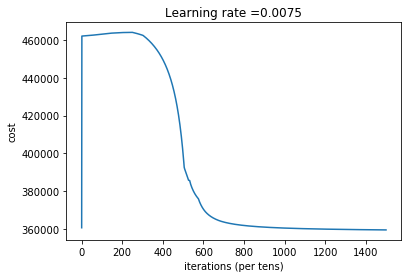

In [29]:
parameters = L_layer_model(train_x, train_y[:,1], layers_dims, ['relu','sigmoid'], num_iterations = 1500, print_cost = True)